In [1]:
import sqlite3
import pandas as pd
import os

conn = sqlite3.connect('/Users/macmini2023/Desktop/jooja!/AI/AIAP_AgroTech/data/agri.db')
cursor = conn.cursor()

# List all table names in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Print the list of tables
print(tables)

[('farm_data',)]


In [2]:
# Query the data from the 'farm_data' table and load it into a pandas DataFrame
df = pd.read_sql_query("SELECT * FROM farm_data", conn)

cursor.close()
conn.close()

df.head(12)

System Location Code Previous Cycle Plant Type           Plant Type  \
0                Zone_D                     Herbs           Vine Crops   
1                Zone_G                     Herbs           VINE CROPS   
2                Zone_F                     Herbs                herbs   
3                Zone_G                     Herbs  fruiting vegetables   
4                Zone_B                Vine Crops         LEAFY GREENS   
5                Zone_C                Vine Crops  FRUITING VEGETABLES   
6                Zone_A              Leafy Greens           Vine Crops   
7                Zone_G                     Herbs         Leafy Greens   
8                Zone_G                     Herbs         Leafy Greens   
9                Zone_B                Vine Crops           Vine Crops   
10               Zone_G              Leafy Greens                Herbs   
11               Zone_B                Vine Crops  Fruiting Vegetables   

   Plant Stage  Temperature Sensor (°C)  Humidity Sensor (%)  \
0     Maturity                    23.34                  NaN   
1   Vegetative                   -24.16                63.14   
2     maturity                    23.84                  NaN   
3   Vegetative                    22.61                  NaN   
4     seedling                    22.88                  NaN   
5     MATURITY                    25.96                  NaN   
6     Maturity                      NaN                  NaN   
7     Maturity                    20.16                  NaN   
8     Maturity                    20.16                  NaN   
9     MATURITY                    25.59                  NaN   
10    Maturity                    23.15                  NaN   
11    Maturity                    26.78                62.27   

    Light Intensity Sensor (lux)  CO2 Sensor (ppm)  EC Sensor (dS/m)  \
0                          454.0               937              1.82   
1                          441.0               938              2.13   
2                          562.0              1246              1.21   
3                          651.0              1346              1.96   
4                          144.0               812              2.76   
5                          675.0              1338              1.75   
6                          514.0              1103              1.14   
7                          317.0              1133              1.52   
8                          317.0              1133              1.52   
9                          435.0               845              2.07   
10                         444.0              1090              1.77   
11                         736.0              1333              2.00   

    O2 Sensor (ppm) Nutrient N Sensor (ppm) Nutrient P Sensor (ppm)  \
0                 4                     161                      64   
1                 6                     161                      53   
2                 8                     228                      79   
3                 6                    None                  53 ppm   
4                 5                      61                      19   
5                 8                     227                      53   
6                 8                     174                      62   
7                10                    None                    None   
8                10                    None                    None   
9                 8                     150                      70   
10                7                    None                      52   
11                7                     178                      55   

   Nutrient K Sensor (ppm)  pH Sensor  Water Level Sensor (mm)  
0                      201        6.1                28.150346  
1                     None        6.5                31.000000  
2                      292        6.4                26.000000  
3                      289        6.6                      NaN  
4                    

In [3]:
df.shape

(57489, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57489 entries, 0 to 57488
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   System Location Code          57489 non-null  object 
 1   Previous Cycle Plant Type     57489 non-null  object 
 2   Plant Type                    57489 non-null  object 
 3   Plant Stage                   57489 non-null  object 
 4   Temperature Sensor (°C)       48800 non-null  float64
 5   Humidity Sensor (%)           18622 non-null  float64
 6   Light Intensity Sensor (lux)  53211 non-null  float64
 7   CO2 Sensor (ppm)              57489 non-null  int64  
 8   EC Sensor (dS/m)              57489 non-null  float64
 9   O2 Sensor (ppm)               57489 non-null  int64  
 10  Nutrient N Sensor (ppm)       47515 non-null  object 
 11  Nutrient P Sensor (ppm)       51791 non-null  object 
 12  Nutrient K Sensor (ppm)       53788 non-null  object 
 13  p

In [5]:
# This gives us a detailed overview of each column, so we have everything in one cell.

import io

def column_df_info(df):
    """
    Provides enhanced information about DataFrame columns including:
    - Number of unique values
    - All unique values for non-numeric columns (except nutrient columns)
    - Statistical information for numeric columns
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame
    """
    title = "DETAILED COLUMN INFORMATION"
    print(f"\n{title}")
    print("-" * len(title))
    
    nutrient_columns = ['Nutrient N Sensor (ppm)', 'Nutrient P Sensor (ppm)', 'Nutrient K Sensor (ppm)']
    
    for column in df.columns:
        column_header = f"Column: {column}"
        print(f"\n{column_header}")
        print("=" * len(column_header))
        
        # Number of unique values
        unique_count = df[column].nunique()
        print(f"Unique values: {unique_count}")
        
        # Null count and percentage
        null_count = df[column].isnull().sum()
        null_percentage = (null_count / len(df)) * 100
        print(f"Null count: {null_count} ({null_percentage:.2f}%)")
        
        # Handle different column types
        if df[column].dtype in ['int64', 'float64'] or column in nutrient_columns:
            # Convert to numeric, coercing errors to NaN for nutrient columns
            series = pd.to_numeric(df[column], errors='coerce') if column in nutrient_columns else df[column]
            
            # Calculate Q1 and Q3
            Q1 = series.quantile(0.25)
            Q3 = series.quantile(0.75)
            IQR = Q3 - Q1
            
            print(f"\nValue Distribution:")
            print(f"Mean: {series.mean():.2f}")
            print(f"Std: {series.std():.2f}")
            print(f"Min: {series.min():.2f}")
            print(f"25%: {Q1:.2f}")
            print(f"50% {series.median():.2f}")
            print(f"75%: {Q3:.2f}")
            print(f"Max: {series.max():.2f}")

            
            # Calculate outlier bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            print(f"\nOutlier Bounds:")
            print(f"Lower bound: {lower_bound:.2f}")
            print(f"Upper bound: {upper_bound:.2f}")
            
        else:
            # For non-numeric columns (excluding nutrient columns), show all unique values
            unique_values = [x for x in df[column].unique() if pd.notna(x)]
            unique_values = sorted(unique_values, key=str.lower)
            print("\nAll unique values:")
            for val in unique_values:
                count = df[column].value_counts()[val]
                print(f"- {val}: {count} occurrences")
        
        print()

column_df_info(df)


DETAILED COLUMN INFORMATION
---------------------------

Column: System Location Code
Unique values: 7
Null count: 0 (0.00%)

All unique values:
- Zone_A: 8148 occurrences
- Zone_B: 8296 occurrences
- Zone_C: 8268 occurrences
- Zone_D: 8062 occurrences
- Zone_E: 8272 occurrences
- Zone_F: 8156 occurrences
- Zone_G: 8287 occurrences


Column: Previous Cycle Plant Type
Unique values: 4
Null count: 0 (0.00%)

All unique values:
- Fruiting Vegetables: 14481 occurrences
- Herbs: 14257 occurrences
- Leafy Greens: 14446 occurrences
- Vine Crops: 14305 occurrences


Column: Plant Type
Unique values: 12
Null count: 0 (0.00%)

All unique values:
- fruiting vegetables: 2128 occurrences
- FRUITING VEGETABLES: 2154 occurrences
- Fruiting Vegetables: 10137 occurrences
- herbs: 2123 occurrences
- Herbs: 10059 occurrences
- HERBS: 2239 occurrences
- LEAFY GREENS: 2183 occurrences
- Leafy Greens: 9968 occurrences
- leafy greens: 2241 occurrences
- Vine Crops: 9921 occurrences
- VINE CROPS: 2173 occurr

From the above info, here's what we noticed:

<b>1. Missing Values:</b>
<ul>
    <li>Humidity Sensor has the most missing values — 18,622 non-null out of 57,489 or 67.6% missing)</li>
    <li>Temperature Sensor has about 15% missing values (48,800 non-null)</li>
    <li>Light Intensity has about 7.5% missing values (53,211 non-null)</li>
    <li>Nutrient sensors (N, P, K) have varying amounts of missing values</li>
    <li>Several columns have no missing values (Location Code, Plant Types, CO$_2$, EC, O$_2$, pH)</li>
</ul>

<b>2. Data Types:</b>
<ul>
    <li>Categorical (object): System Location Code, Previous Cycle Plant Type, Plant Type, Plant Stage</li>
    <li>Numeric (float64): Temperature, Humidity, Light Intensity, EC, pH, Water Level</li>
    <li>Integer (int64): CO$_2$, O$_2$</li>
    <li>Nutrient sensors (N, P, K) are stored as objects despite being numeric - will need conversion</li>
</ul>

<b>3. Main Data Quality Issues to Address:</b>
<ul>
    <li>High percentage of missing values in Humidity Sensor</li>
    <li>In Temperature Sensor, extreme outliers detected, particularly the -28.57°C reading, which seems implausible for indoor growing conditions</li>
    <li>The three Nutrient Sensors stored as 'objects' instead of numeric types</li>
    <li>Potential inconsistent formatting in categorical variables</li>
</ul>


In [6]:
# Now, let's check and count the sum of missing values for each column, out of 57489 rows.
df.isnull().sum()

System Location Code                0
Previous Cycle Plant Type           0
Plant Type                          0
Plant Stage                         0
Temperature Sensor (°C)          8689
Humidity Sensor (%)             38867
Light Intensity Sensor (lux)     4278
CO2 Sensor (ppm)                    0
EC Sensor (dS/m)                    0
O2 Sensor (ppm)                     0
Nutrient N Sensor (ppm)          9974
Nutrient P Sensor (ppm)          5698
Nutrient K Sensor (ppm)          3701
pH Sensor                           0
Water Level Sensor (mm)          8642
dtype: int64

In [7]:
# Now, let's find all duplicate rows in the DataFrame, including both the original and its duplicates.
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

System Location Code Previous Cycle Plant Type           Plant Type  \
16533               Zone_A       Fruiting Vegetables  FRUITING VEGETABLES   
16534               Zone_A       Fruiting Vegetables  FRUITING VEGETABLES   
506                 Zone_A       Fruiting Vegetables  FRUITING VEGETABLES   
507                 Zone_A       Fruiting Vegetables  FRUITING VEGETABLES   
48444               Zone_A       Fruiting Vegetables  FRUITING VEGETABLES   
...                    ...                       ...                  ...   
20772               Zone_G                Vine Crops           vine crops   
14306               Zone_G                Vine Crops           vine crops   
14307               Zone_G                Vine Crops           vine crops   
32482               Zone_G                Vine Crops           vine crops   
32483               Zone_G                Vine Crops           vine crops   

      Plant Stage  Temperature Sensor (°C)  Humidity Sensor (%)  \
16533    Maturity                    22.72                  NaN   
16534    Maturity                    22.72                  NaN   
506      Maturity                    22.74                  NaN   
507      Maturity                    22.74                  NaN   
48444    Maturity                    24.43                  NaN   
...           ...                      ...                  ...   
20772    Seedling                      NaN                  NaN   
14306  Vegetative                    23.65                  NaN   
14307  Vegetative                    23.65                  NaN   
32482  Vegetative                      NaN                64.43   
32483  Vegetative                      NaN                64.43   

       Light Intensity Sensor (lux)  CO2 Sensor (ppm)  EC Sensor (dS/m)  \
16533                         711.0              1339              1.65   
16534                         711.0              1339              1.65   
506                           699.0              1429              1.60   
507                           699.0              1429              1.60   
48444                         663.0              1089              1.46   
...                             ...               ...               ...   
20772                         200.0               830              1.21   
14306                         425.0               912              1.71   
14307                         425.0               912              1.71   
32482                         417.0              1155              2.15   
32483                         417.0              1155              2.15   

       O2 Sensor (ppm) Nutrient N Sensor (ppm) Nutrient P Sensor (ppm)  \
16533                8                     169                      67   
16534                8                     169                      67   
506                  7                     200                      68   
507                  7                     200                      68   
48444                7                    None                    None   
...                ...                     ...                     ...   
20772                5                     131                      30   
14306                7                    None                    None   
14307                7                    None                    None   
32482                7                     188                      64   
32483                7                     188                      64   

      Nutrient K Sensor (ppm)  pH Sensor  Water Level Sensor (mm)  
16533                     214        6.5                      NaN  
16534                     214        6.5                      NaN  
506                       225        6.1                10.641670  
507                       225        6.1                10.641670  
48444                     204        6.2                11.379721  
...                       ...        ...                      ...  
20772     

In [8]:
# The total number of duplicate rows in a DataFrame is...
df.duplicated().sum()

7489

# UNIVARIATE ANALYSIS
Before moving on to Data Cleaning, let's do a quick analysis and visualisation of the data.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Univariate Analysis of the Temperature Sensor (ºC)

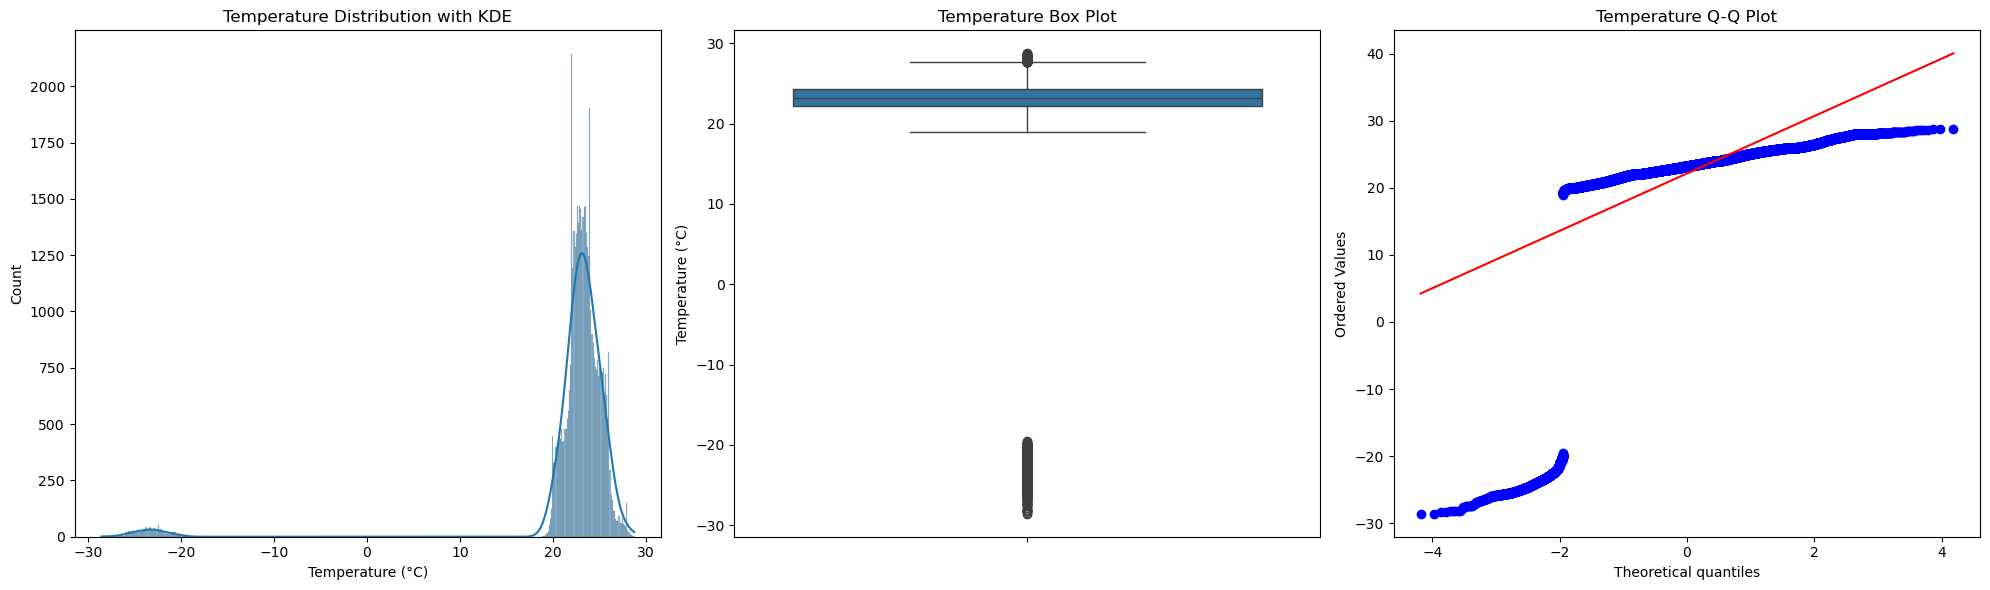


Temperature Summary Statistics:
count    48800.000000
mean        22.138201
std          7.556981
min        -28.570000
25%         22.140000
50%         23.210000
75%         24.350000
max         28.750000
Name: Temperature Sensor (°C), dtype: float64

Outlier Analysis:
Number of outliers: 1575
Percentage of outliers: 3.23%
Outlier range: -28.57°C to 28.75°C


In [10]:
'''Let's start with the analysis of the Temperature distribution
since this the first task we need to address, which is to predicting the
temperature conditions within the farm's closed environment to ensure optimal plant growth.'''

# Create a figure with 3 subplots for different views of temperature distribution
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# 1. Histogram with KDE (Kernel Density Estimation)
sns.histplot(data=df, x='Temperature Sensor (°C)', kde=True, ax=ax1)
ax1.set_title('Temperature Distribution with KDE')
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Count')

# 2. Box Plot
sns.boxplot(y=df['Temperature Sensor (°C)'], ax=ax2)
ax2.set_title('Temperature Box Plot')
ax2.set_ylabel('Temperature (°C)')

# 3. Q-Q Plot to check for normality
# Corrected syntax for probplot
stats.probplot(df['Temperature Sensor (°C)'].dropna(), dist="norm", plot=ax3)
ax3.set_title('Temperature Q-Q Plot')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nTemperature Summary Statistics:")
print(df['Temperature Sensor (°C)'].describe())

# Calculate the percentage of outliers using IQR method
Q1 = df['Temperature Sensor (°C)'].quantile(0.25)
Q3 = df['Temperature Sensor (°C)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Temperature Sensor (°C)'] < lower_bound) | 
              (df['Temperature Sensor (°C)'] > upper_bound)]['Temperature Sensor (°C)']

print(f"\nOutlier Analysis:")
print(f"Number of outliers: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers) / len(df['Temperature Sensor (°C)'].dropna()) * 100):.2f}%")
print(f"Outlier range: {outliers.min():.2f}°C to {outliers.max():.2f}°C")

From the above three plots, we noticed:

#### Histogram Plot:
- The main peak is around 22-24°C, which is typical for most plant growth
- The distribution has a notable left skew (tail extends towards lower temperatures)
- The extreme negative temperatures (-28.57°C) are visible as outliers on the far left

#### Box Plot:
- The median temperature is around 23°C, which is appropriate for indoor farming
- The interquartile range (box) is relatively narrow, indicating good temperature control in normal conditions
- There are numerous outliers (points) beyond the whiskers, particularly on the lower end
- The severe outliers below 0°C are likely measurement errors or sensor malfunctions, as these temperatures would be lethal for most plants
- The upper outliers extend to about 29°C, which are more plausible than the lower outliers

#### Q-Q Plot:
- The S-shaped curve in the Q-Q plot confirms that the data is not normally distributed
- The deviation from the diagonal line at both ends indicates heavy tails (more extreme values than expected in a normal distribution)
- The middle section's curve suggests the bimodal nature we observed in the histogram
- The extreme deviations at the lower end correspond to those implausible negative temperature readings

## Univariate Analysis of Humidity Sensor (%) and Light Intensity Sensor (lux)


Summary for Humidity Sensor (%):
Mean: 69.24
Median: 68.70
Std Dev: 5.73
No. of outliers: 0
% of outliers: 0.00%
Range: 59.22 to 81.14
Missing values: 38867 (67.61%)

Summary for Light Intensity Sensor (lux):
Mean: 397.84
Median: 403.00
Std Dev: 222.92
No. of outliers: 1279
% of outliers: 2.40%
Range: -799.00 to 800.00
Missing values: 4278 (7.44%)


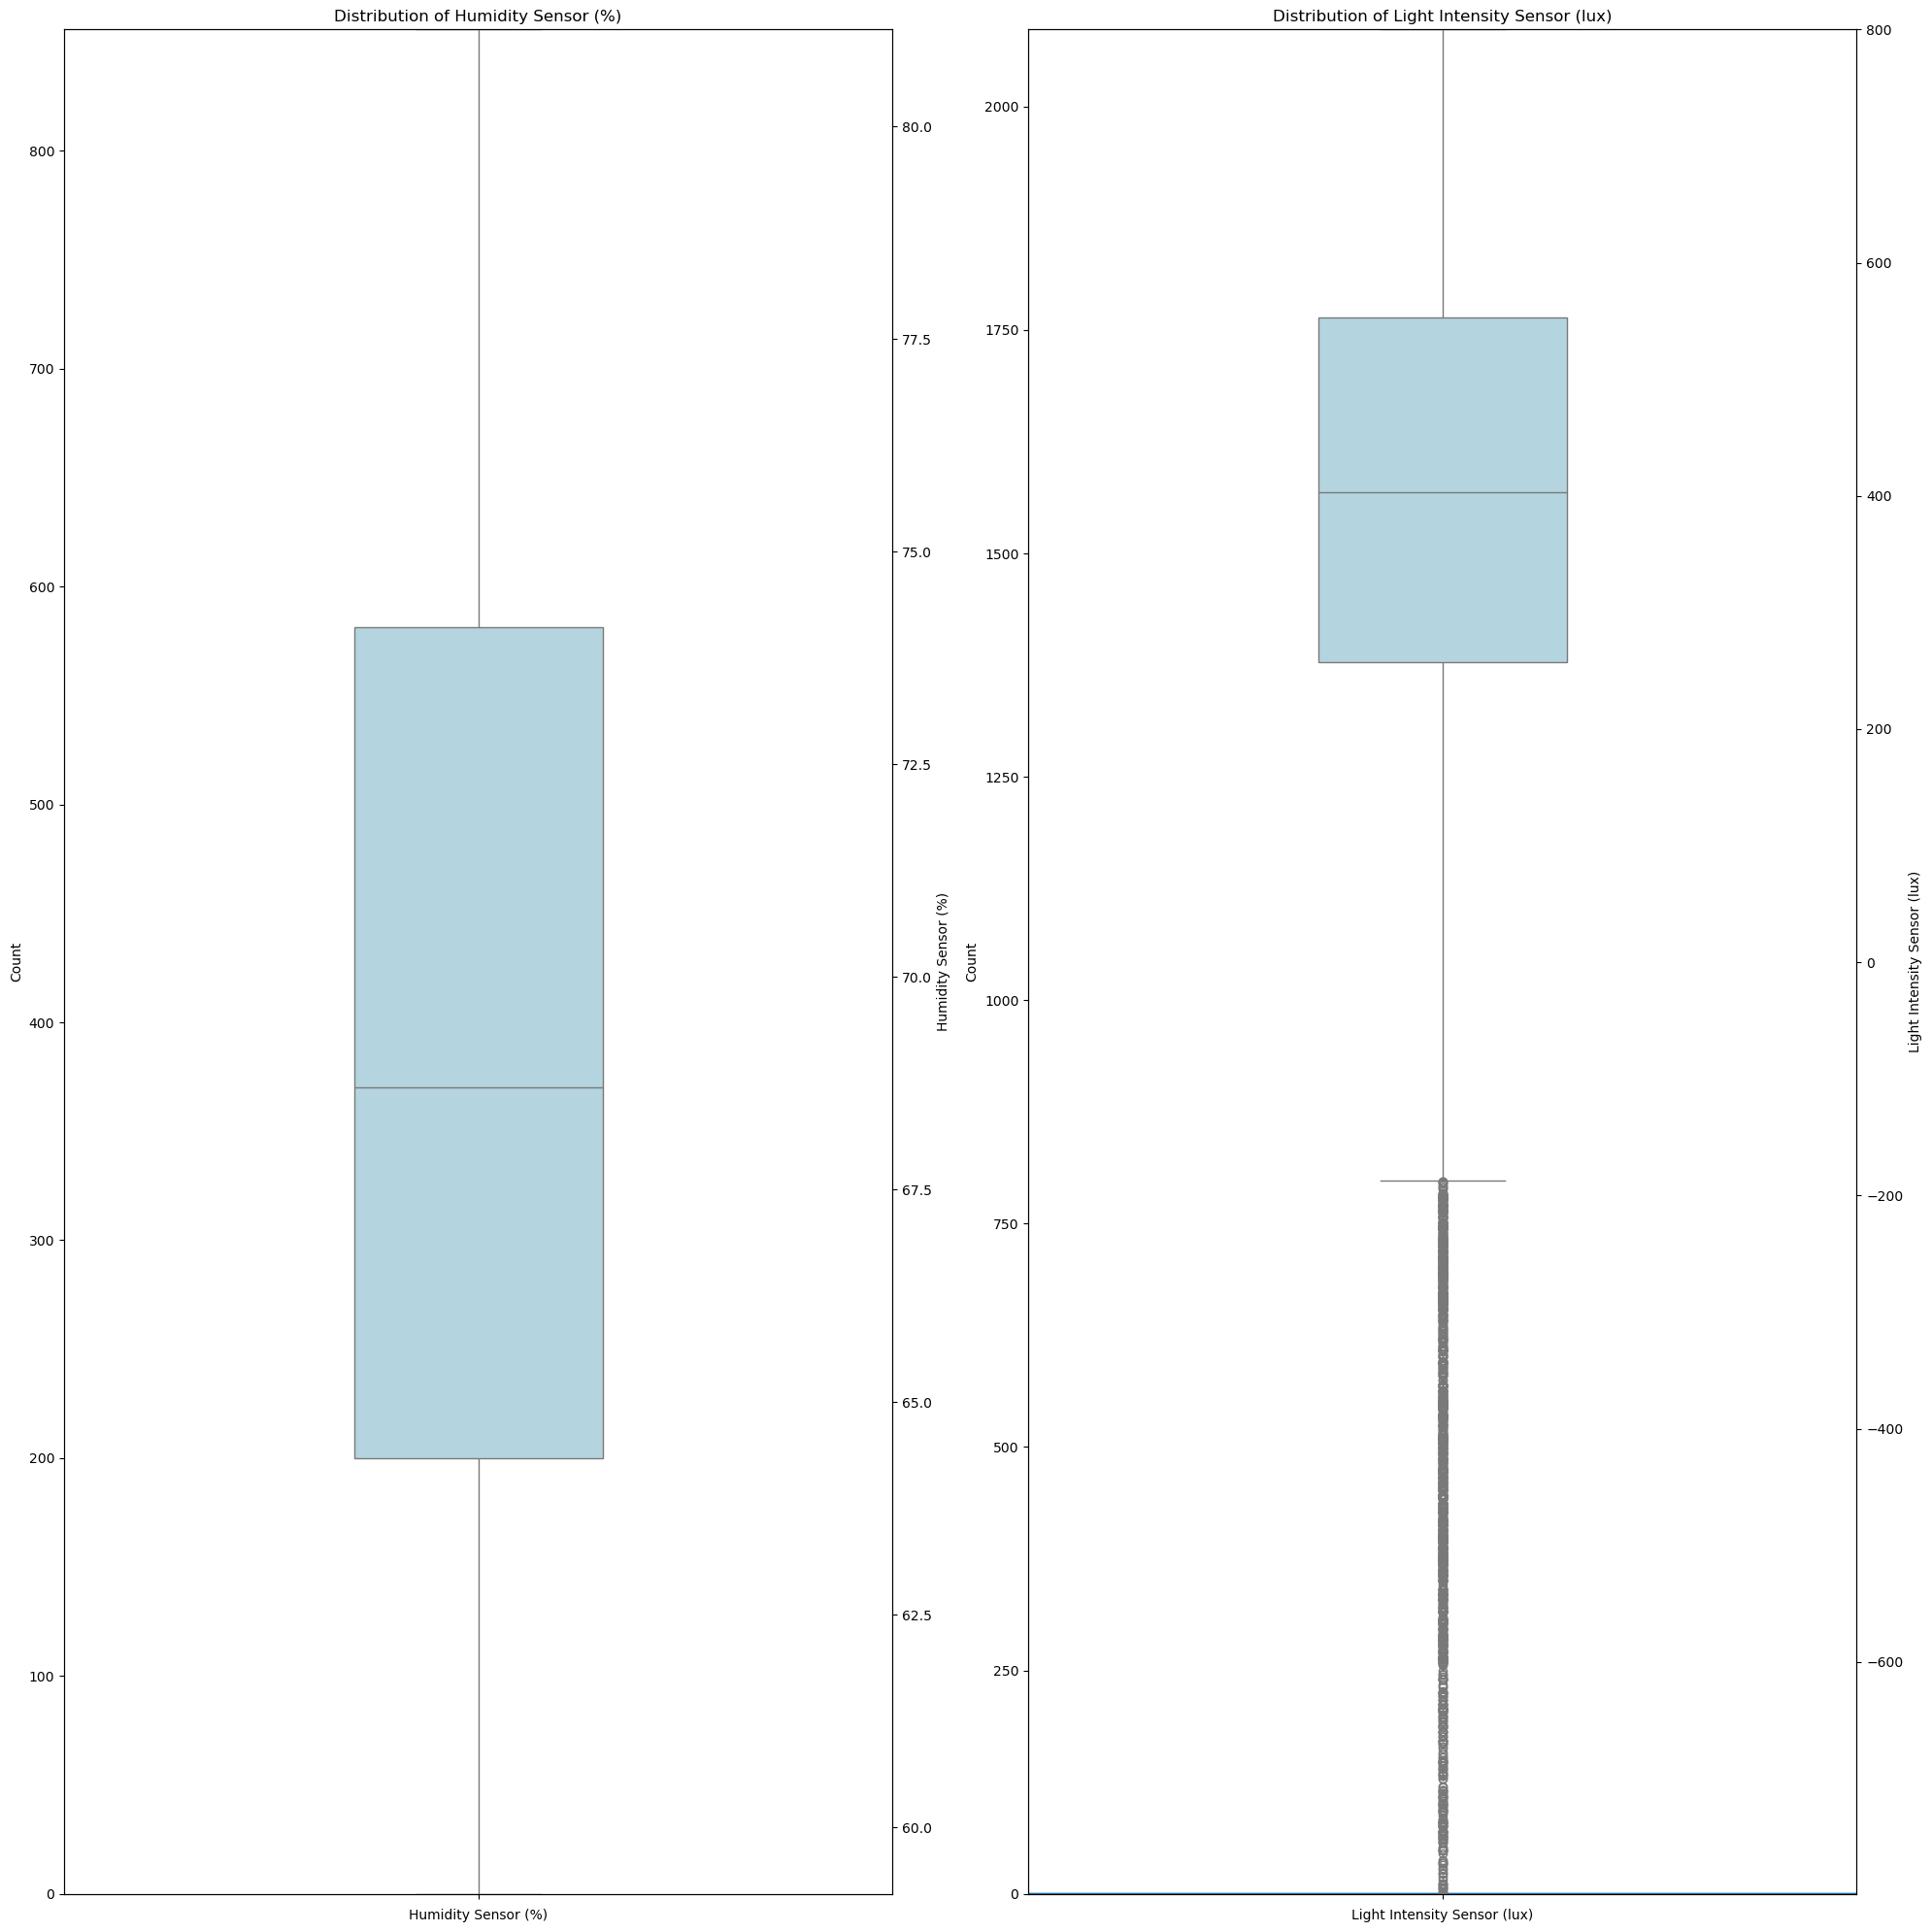

In [11]:
'''Now, we'll analyse the columns of Humidity Sensor and Light Intensity Sensor'''

numerical_sensors = [
    'Humidity Sensor (%)',
    'Light Intensity Sensor (lux)'
]

# Create subplots for each sensor
fig, axes = plt.subplots(1, 2, figsize=(20, 20))
axes = axes.ravel()  # Flatten the axes array for easier iteration

# Create plots for each sensor
for idx, sensor in enumerate(numerical_sensors):
    # Distribution plot (histogram + kde)
    sns.histplot(data=df, x=sensor, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {sensor}')
    
    # Add a box plot below the histogram
    ax2 = axes[idx].twinx()
    sns.boxplot(data=df, y=sensor, ax=ax2, width=0.3, color='lightblue')
    ax2.set_ylim(df[sensor].min(), df[sensor].max())
    
    # Calculate summary statistics
    Q1 = df[sensor].quantile(0.25)
    Q3 = df[sensor].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[sensor] < lower_bound) | (df[sensor] > upper_bound)][sensor]
    
    # Print statistics
    print(f"\nSummary for {sensor}:")
    print(f"Mean: {df[sensor].mean():.2f}")
    print(f"Median: {df[sensor].median():.2f}")
    print(f"Std Dev: {df[sensor].std():.2f}")
    print(f"No. of outliers: {len(outliers)}")
    print(f"% of outliers: {(len(outliers) / len(df[sensor].dropna()) * 100):.2f}%")
    print(f"Range: {df[sensor].min():.2f} to {df[sensor].max():.2f}")
    print(f"Missing values: {df[sensor].isnull().sum()} ({(df[sensor].isnull().sum() / len(df) * 100):.2f}%)")

# Adjust layout
plt.tight_layout()
plt.show()

Here's what we notice about both sensors:

#### Humidity Sensor (%):
- Huge missing data: 67.61% (38,867)
- Mean (69.24%) is very close to median (68.70%), suggesting a symmetric distribution
- Standard deviation is relatively small (5.73%), indicating tight clustering around the mean
- Range is reasonable for indoor farming (59.22% to 81.14%)
- No outliers, suggesting good sensor calibration when it works

<b>Key Insights:</b>
- When the sensor works, it provides reliable data within expected ranges
- The main concern is the high percentage of missing values

#### Light Intensity Sensor (lux):
- Some missing data: 7.44% (4,278)
- 2.40% (1,279) outliers identified
- Significant data quality issue: negative values (minimum -799 lux) which is physically impossible
- Large standard deviation (222.92 lux) indicating high variability
- Range from -799 to 800 lux, with negative values being clearly erroneous

<b>Key Insights:</b>
- The negative values need to be addressed in data cleaning
- The spread of values suggests different lighting conditions across zones/times


# BIVARIATE ANALYSIS
Let's do some analyses of two variables to see if there's any relationship between one and the other.

## Bivariate Analysis of Temperature Sensor (ºC) vs. System Location Code

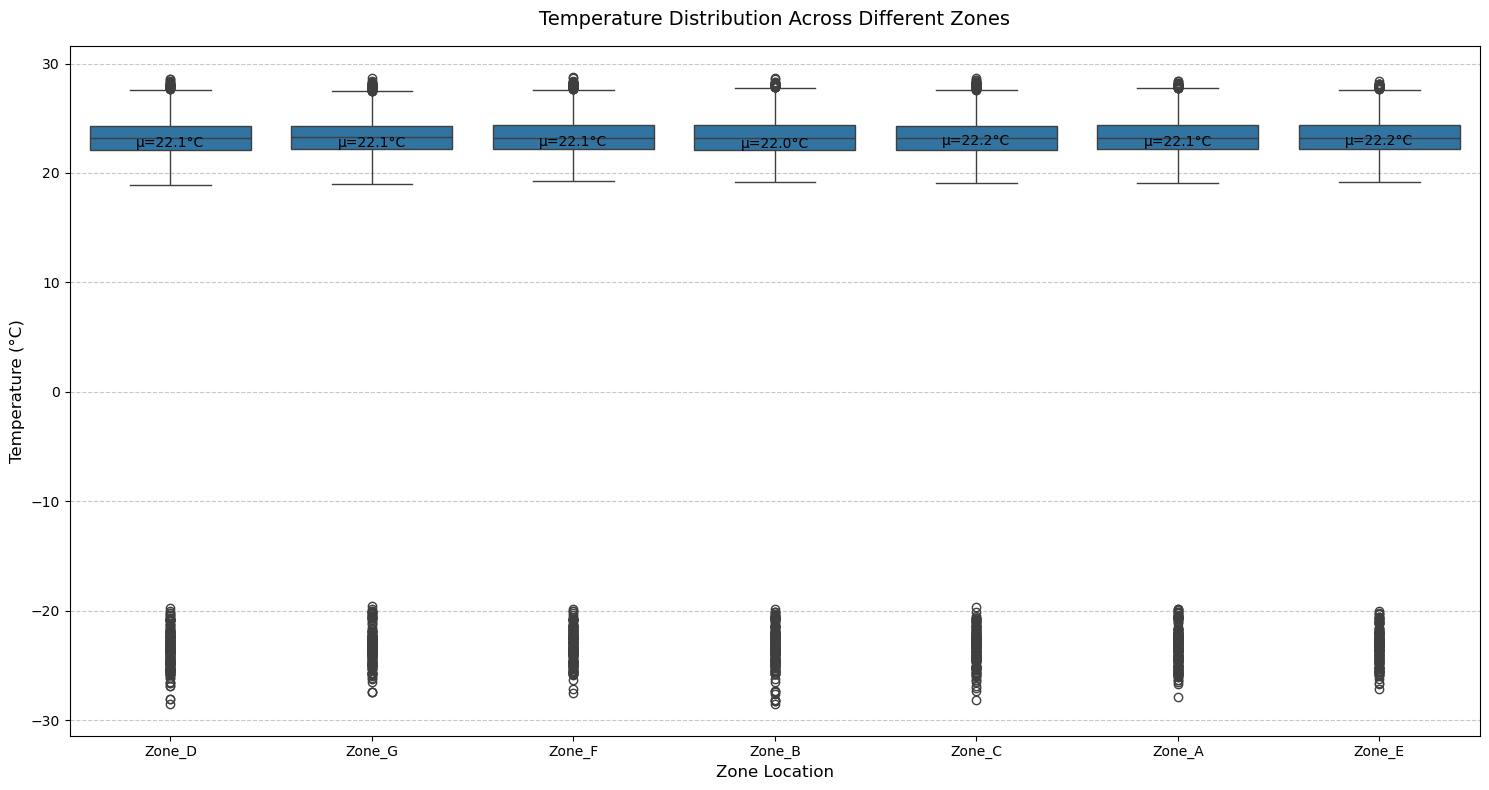


Temperature Summary Statistics by Zone:
                       count       mean       std    min    25%    50%    75%  \
System Location Code                                                            
Zone_A                6882.0  22.074717  7.835381 -27.88  22.19  23.23  24.41   
Zone_B                7035.0  22.102159  7.719936 -28.54  22.13  23.23  24.40   
Zone_C                7020.0  22.144755  7.464541 -28.15  22.12  23.19  24.31   
Zone_D                6862.0  22.014248  7.841433 -28.57  22.09  23.20  24.32   
Zone_E                7012.0  22.245073  7.211711 -27.15  22.15  23.20  24.34   
Zone_F                6968.0  22.147345  7.569256 -27.56  22.17  23.22  24.36   
Zone_G                7021.0  22.235323  7.241309 -27.44  22.17  23.24  24.29   

                        max  
System Location Code         
Zone_A                28.40  
Zone_B                28.64  
Zone_C                28.71  
Zone_D                28.54  
Zone_E                28.36  
Zone_F             

In [12]:
# Create the box plot
plt.figure(figsize=(15, 8))

# Create box plot with Seaborn
sns.boxplot(data=df, x='System Location Code', y='Temperature Sensor (°C)')

# Customize the plot
plt.title('Temperature Distribution Across Different Zones', fontsize=14, pad=15)
plt.xlabel('Zone Location', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add a grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show mean values
means = df.groupby('System Location Code')['Temperature Sensor (°C)'].mean()
for i, mean_val in enumerate(means):
   plt.text(i, mean_val, f'μ={mean_val:.1f}°C', 
            horizontalalignment='center', verticalalignment='bottom')

plt.tight_layout()
plt.show()

# Print summary statistics for each zone
print("\nTemperature Summary Statistics by Zone:")
print(df.groupby('System Location Code')['Temperature Sensor (°C)'].describe())

# Calculate the temperature range for each zone
temp_ranges = df.groupby('System Location Code')['Temperature Sensor (°C)'].agg(
   temperature_range=lambda x: x.max() - x.min()
).round(2)
print("\nTemperature Range by Zone:")
print(temp_ranges)

Let's analyse the temperature distributions across zones:

- Very consistent mean temperatures across all zones (22.01°C - 22.24°C). This is good!
- All zones maintain very similar median temperatures
- This suggests excellent temperature control consistency across zones
- Standard deviations range from 7.21°C (Zone E) to 7.84°C (Zone A)
- Interquartile ranges (25th to 75th percentiles) are very tight, with IQR consistent at about 2.2°C across all zones
- Minimum temperatures are problematic across all zones (-27.15°C to -28.57°C)
- Maximum temperatures are very consistent (28.36°C - 28.75°C)
- Temperature ranges are similar across zones (55.51°C - 57.18°C)

<b>Key Insights:</b>
- Investigate the Temperature Sensor as negative readings appear in all zones
- Consider using Zone E's temperature control setup as a benchmark for other zones
- For modeling purposes, treating all zones as having similar temperature characteristics



## Bivariate Analysis of Various Columns (Variables) with Scatter Plot

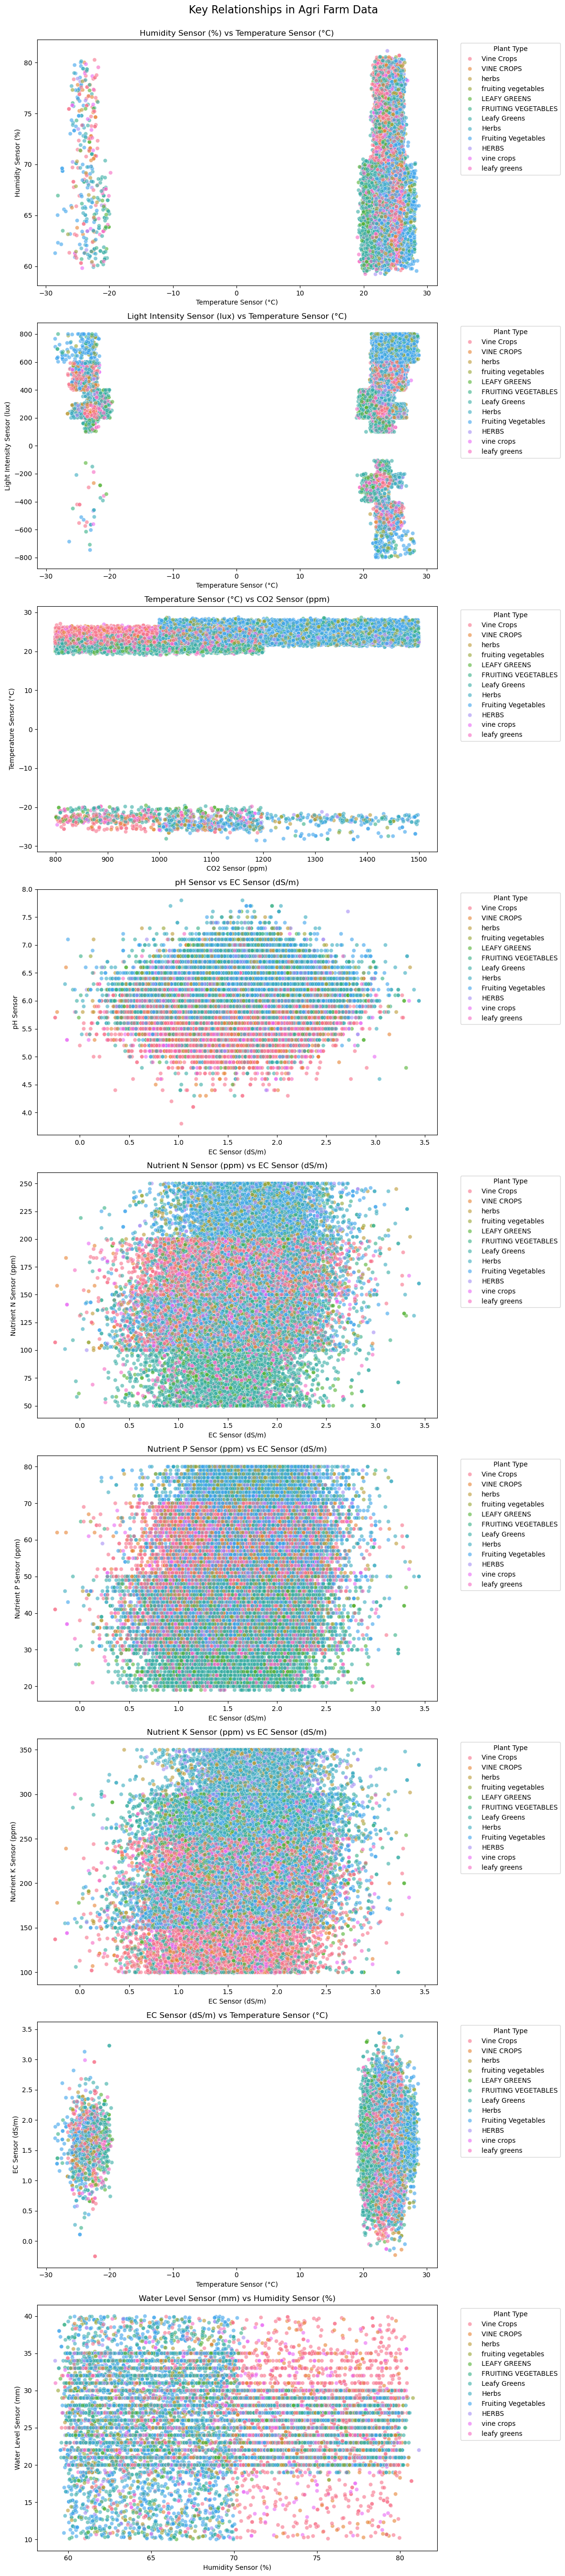

In [13]:
'''Now we'll identify patterns, correlations, and potential causal relationships
between various variables. Because Nutrients are in object (data type), we did 
a quick conversion to numeric.
'''

def prepare_data(df):
    """
    Prepare the data by converting nutrient columns to numeric and handling null values
    """
    df_clean = df.copy()
    
    # Convert nutrient columns from object to numeric
    nutrient_cols = ['Nutrient N Sensor (ppm)', 'Nutrient P Sensor (ppm)', 'Nutrient K Sensor (ppm)']
    for col in nutrient_cols:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    return df_clean

def create_scatter_plots(df):
    """
    Create individual scatter plots for important variable relationships
    """
    # Define the relationships to plot
    relationships = [
        # Environmental relationships
        ('Temperature Sensor (°C)', 'Humidity Sensor (%)', 'Plant Type'),
        ('Temperature Sensor (°C)', 'Light Intensity Sensor (lux)', 'Plant Type'),
        ('CO2 Sensor (ppm)', 'Temperature Sensor (°C)', 'Plant Type'),
        
        # Nutrient relationships
        ('EC Sensor (dS/m)', 'pH Sensor', 'Plant Type'),
        ('EC Sensor (dS/m)', 'Nutrient N Sensor (ppm)', 'Plant Type'),
        ('EC Sensor (dS/m)', 'Nutrient P Sensor (ppm)', 'Plant Type'),
        ('EC Sensor (dS/m)', 'Nutrient K Sensor (ppm)', 'Plant Type'),
        
        # Cross-domain relationships
        ('Temperature Sensor (°C)', 'EC Sensor (dS/m)', 'Plant Type'),
        ('Humidity Sensor (%)', 'Water Level Sensor (mm)', 'Plant Type')
    ]
    
    # Calculate number of rows needed
    n_relationships = len(relationships)
    
    # Create one plot per row
    fig, axes = plt.subplots(n_relationships, 1, figsize=(12, 6*n_relationships))
    fig.suptitle('Key Relationships in Agri Farm Data', y=1, size=16)
    
    # Create each scatter plot
    for i, (x_var, y_var, hue_var) in enumerate(relationships):
        sns.scatterplot(
            data=df,
            x=x_var,
            y=y_var,
            hue=hue_var,
            alpha=0.6,
            ax=axes[i]
        )
        
        axes[i].set_title(f'{y_var} vs {x_var}')
        axes[i].legend(title=hue_var, bbox_to_anchor=(1.05, 1), loc='upper left')
        
    plt.tight_layout()
    return fig

# Example usage:
def analyze_hydroponic_data(df):
    # Prepare the data
    df_clean = prepare_data(df)
    
    # Create scatter plots
    fig = create_scatter_plots(df_clean)
    
    # Display the plots
    plt.show()

analyze_hydroponic_data(df)

Analysis of each scatter plot:

#### 1. Humidity vs Temperature:
- Shows a slight negative correlation - as temperature increases, humidity tends to decrease
- Data points cluster around 20-25°C with humidity between 60-80%
- No clear separation between plant types

#### 2. Light Intensity vs Temperature:
- Moderate positive correlation
- Light intensity increases with temperature
- Most measurements cluster between 200-600 lux
- Appears to have some outliers at very low light intensity

#### 3. CO$_2$ vs Temperature:
- Horizontal banding pattern suggests discrete CO2 measurements
- CO2 levels mostly maintained between 800-1500 ppm
- No strong correlation with temperature
- All plant types show similar patterns

#### 4. pH vs EC:
- Strong oval pattern suggests controlled conditions
- Most measurements cluster between pH 5.5-6.5
- EC values mostly between 1.0-2.5 dS/m
- Shows clear monitoring and control of these parameters

#### 5. Nutrient N vs EC:
- Strong positive correlation - higher EC associated with higher nitrogen levels
- Nitrogen levels mostly between 100-250 ppm
- Fairly consistent pattern across plant types

#### 6. Nutrient P vs EC:
- Moderate positive correlation with EC
- Phosphorus levels typically between 20-80 ppm
- Similar pattern across plant types

#### 7. Nutrient K vs EC:
- Strong positive correlation with EC
- Potassium levels mostly between 150-300 ppm
- Consistent relationship across different plant types

#### 8. EC vs Temperature:
- No strong correlation
- EC values remain fairly stable across temperature range
- Suggests temperature-independent nutrient management

#### 9. Water Level vs Humidity:
- Shows distinct horizontal banding
- No clear correlation between water level and humidity
- Water levels appear to be maintained within specific ranges

<b>Key Insights:</b>
- Most parameters are tightly controlled within specific ranges
- Nutrient levels (N, P, K) show clear correlations with EC
- Environmental parameters (temperature, humidity, light) show expected natural relationships
- Plant types generally show similar patterns, suggesting standardized growing conditions
- The system appears well-regulated with clear operational boundaries

# CORRELATION ANALYSIS
With heat maps, we can measure and interpret the strength and direction of relationships between pairs of features, and identify which features move together and to what extent.

For this dataset, we will be using the <b>Spearman correlation</b> because:
- The data has a significant amount of missing values
- We're working with sensor data which might not follow normal distributions
- There might be non-linear relationships between variables
- Some of the variables show potential outliers as shown in previous analyses

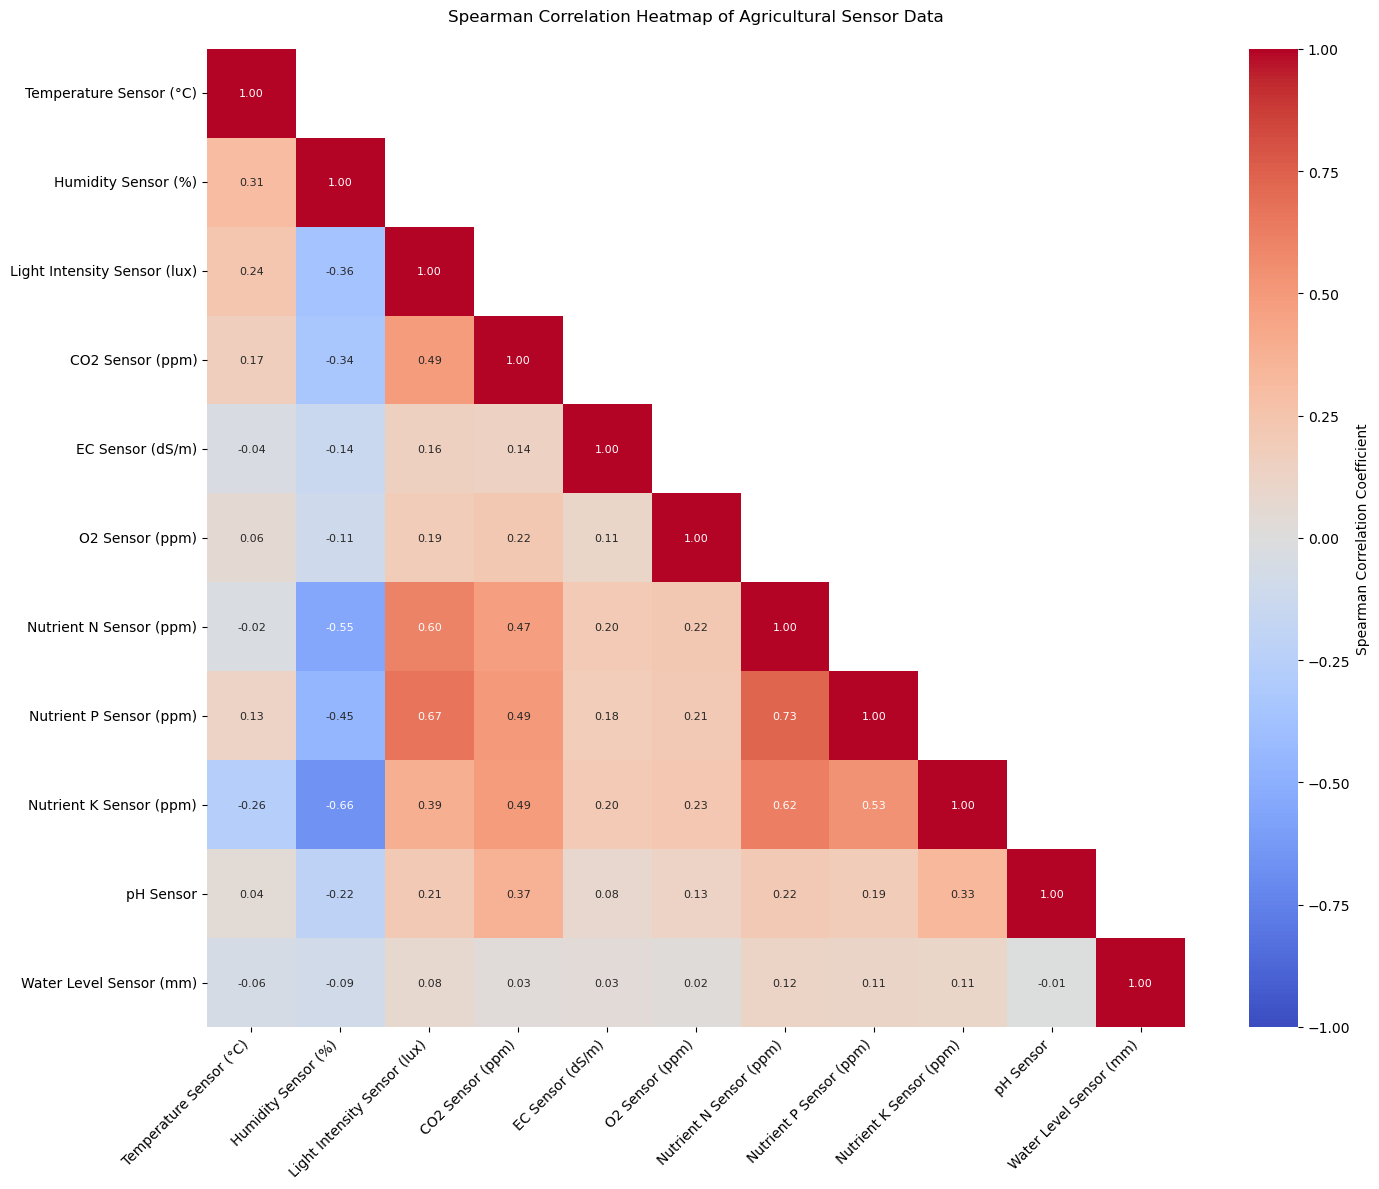

In [14]:
def create_spearman_heatmap(df):
    """
    Create and display Spearman correlation heatmap for sensor data
    
    Parameters:
    - df: DataFrame containing the sensor data
    """
    # First convert nutrient columns to numeric
    df_clean = df.copy()
    nutrient_cols = ['Nutrient N Sensor (ppm)', 'Nutrient P Sensor (ppm)', 'Nutrient K Sensor (ppm)']
    for col in nutrient_cols:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    # Define all numerical columns including nutrients
    numerical_columns = [
        'Temperature Sensor (°C)',
        'Humidity Sensor (%)',
        'Light Intensity Sensor (lux)',
        'CO2 Sensor (ppm)',
        'EC Sensor (dS/m)',
        'O2 Sensor (ppm)',
        'Nutrient N Sensor (ppm)',
        'Nutrient P Sensor (ppm)',
        'Nutrient K Sensor (ppm)',
        'pH Sensor',
        'Water Level Sensor (mm)'
    ]
    
    # Create Spearman correlation matrix
    correlation_matrix = df_clean[numerical_columns].corr(method='spearman')
    
    # Set up the matplotlib figure
    plt.figure(figsize=(15, 12))  # Slightly larger figure to accommodate more variables
    
    # Create mask for upper triangle
    mask = np.triu(np.ones_like(correlation_matrix), k=1)
    
    # Create heatmap
    sns.heatmap(
        correlation_matrix,
        annot=True,  # Show correlation values
        cmap='coolwarm',  # Color scheme: red for positive, blue for negative correlations
        center=0,  # Center the colormap at 0
        vmin=-1,  # Minimum correlation value
        vmax=1,   # Maximum correlation value
        fmt='.2f',  # Round correlation values to 2 decimal places
        square=True,  # Make the plot square-shaped
        mask=mask,  # Apply mask to show only lower triangle
        cbar_kws={'label': 'Spearman Correlation Coefficient'},
        annot_kws={'size': 8}  # Smaller font size for annotations
    )
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    # Add title
    plt.title('Spearman Correlation Heatmap of Agricultural Sensor Data', pad=20)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    return plt

create_spearman_heatmap(df)
plt.show()

#### From the above Heat Map, we noticed:

#### Strong/Moderate Correlations:
- CO2 and Light Intensity show a moderate positive correlation (0.39) in the Spearman analysis, suggesting that as light intensity increases, CO2 levels tend to increase as well. This could be related to photosynthesis activity.
- CO2 and pH also show a moderate positive correlation (0.37), indicating that higher CO2 levels are somewhat associated with higher pH values.
- Temperature and Humidity show a moderate correlation (0.31).

#### Weak Negative Correlations:
- Humidity shows several negative correlations with other parameters:
   - With Light Intensity (-0.36)
   - With CO2 (-0.34)
   - With pH (-0.22)
   This suggests that as humidity increases, these other parameters tend to decrease slightly.

#### Independence:
- Water Level shows very weak correlations with all other parameters (correlations between -0.02 and 0.04), indicating it operates independently of other environmental factors.

<b>Key Insights:</b>
- For temperature prediction, Humidity and Light Intensity could be useful predictors
- For Plant Type-Stage classification, the strong correlations between CO2, Light Intensity, and pH suggest these might be useful combined features
- The independent behavior of water level means they might provide unique information for classification


# DATA CLEANING

We'll do some cleaning to improve data quality and model performance. Some of which are:
- Standardising formats and data type
- Correcting typos and spellings
- Ensuring consistent naming conventions
- Handling Missing Values
- Removing Unnecessary Data
- Removing Duplicate Entries

## Data Type

In [15]:
# Let's start wth the data type of the three Nutrient columns

def convert_nutrient_columns(df):
    """
    Convert nutrient columns from object to numeric type and display conversion summary
    
    Parameters:
    - df: Original DataFrame
    
    Returns:
    - DataFrame with converted nutrient columns
    - Dictionary containing conversion summary
    """
    # Create a copy of the dataframe
    df_clean = df.copy()
    
    # List of nutrient columns
    nutrient_cols = [
        'Nutrient N Sensor (ppm)',
        'Nutrient P Sensor (ppm)',
        'Nutrient K Sensor (ppm)'
    ]
    
    # Dictionary to store conversion summary
    conversion_summary = {}
    
    for col in nutrient_cols:
        # Store original info
        original_nulls = df[col].isnull().sum()
        
        # Convert to numeric
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        
        # Store conversion summary
        conversion_summary[col] = {
            'original_dtype': df[col].dtype,
            'new_dtype': df_clean[col].dtype,
            'original_nulls': original_nulls,
            'new_nulls': df_clean[col].isnull().sum(),
            'additional_nulls': df_clean[col].isnull().sum() - original_nulls,
            'min_value': df_clean[col].min(),
            'max_value': df_clean[col].max(),
            'mean_value': df_clean[col].mean()
        }
    
    return df_clean, conversion_summary

# To use the function:
df_clean, summary = convert_nutrient_columns(df)

# Print summary
for col, info in summary.items():
    print(f"\nColumn: {col}")
    print(f"Original dtype: {info['original_dtype']}")
    print(f"New dtype: {info['new_dtype']}")
    print(f"Original null count: {info['original_nulls']}")
    print(f"New null count: {info['new_nulls']}")
    print(f"Additional nulls from conversion: {info['additional_nulls']}")
    print(f"Value range: {info['min_value']:.2f} to {info['max_value']:.2f}")
    print(f"Mean value: {info['mean_value']:.2f}")


Column: Nutrient N Sensor (ppm)
Original dtype: object
New dtype: float64
Original null count: 9974
New null count: 10202
Additional nulls from conversion: 228
Value range: 49.00 to 250.00
Mean value: 157.67

Column: Nutrient P Sensor (ppm)
Original dtype: object
New dtype: float64
Original null count: 5698
New null count: 5955
Additional nulls from conversion: 257
Value range: 19.00 to 80.00
Mean value: 49.86

Column: Nutrient K Sensor (ppm)
Original dtype: object
New dtype: float64
Original null count: 3701
New null count: 3963
Additional nulls from conversion: 262
Value range: 99.00 to 350.00
Mean value: 217.96


In [16]:
# Next, we standardise the text casing of Plant Type

def standardize_plant_type(column):
    """
    Standardize Plant Type values to consistent case format and display changes
    
    Parameters:
    - column: Series containing Plant Type values
    
    Returns:
    - Standardized Series
    """
    # Get original value counts
    original_values = column.value_counts()
    
    # Standardize the values (convert to title case)
    standardized_column = column.str.title()
    
    # Get new value counts
    new_values = standardized_column.value_counts()
    
    # Print summary
    print("Original Plant Type Distribution:")
    print("--------------------------------")
    print(original_values)
    print("\nAfter Standardization:")
    print("----------------------")
    print(new_values)
    print(f"\nOriginal unique values: {len(original_values)}")
    print(f"New unique values: {len(new_values)}")
    
    # Optional: Display sample of changes
    print("\nSample of changes:")
    print(pd.concat([
        column.head(10),
        standardized_column.head(10)
    ], axis=1, keys=['Original', 'Standardized']))
    
    return standardized_column

# Apply the standardization to the Plant Type column in df_clean
df_clean['Plant Type'] = standardize_plant_type(df_clean['Plant Type'])

Original Plant Type Distribution:
--------------------------------
Plant Type
Fruiting Vegetables    10137
Herbs                  10059
Leafy Greens            9968
Vine Crops              9921
leafy greens            2241
HERBS                   2239
LEAFY GREENS            2183
VINE CROPS              2173
vine crops              2163
FRUITING VEGETABLES     2154
fruiting vegetables     2128
herbs                   2123
Name: count, dtype: int64

After Standardization:
----------------------
Plant Type
Herbs                  14421
Fruiting Vegetables    14419
Leafy Greens           14392
Vine Crops             14257
Name: count, dtype: int64

Original unique values: 12
New unique values: 4

Sample of changes:
              Original         Standardized
0           Vine Crops           Vine Crops
1           VINE CROPS           Vine Crops
2                herbs                Herbs
3  fruiting vegetables  Fruiting Vegetables
4         LEAFY GREENS         Leafy Greens
5  FRUITING VEG

In [17]:
# Now, we do the same for Plant Stage

def standardize_plant_stage(column):
    """
    Standardize Plant Stage values to consistent case format and display changes
    
    Parameters:
    - column: Series containing Plant Stage values
    
    Returns:
    - Standardized Series
    """
    # Get original value counts
    original_values = column.value_counts()
    
    # Standardize the values (convert to title case)
    standardized_column = column.str.title()
    
    # Get new value counts
    new_values = standardized_column.value_counts()
    
    # Print summary
    print("Original Plant Stage Distribution:")
    print("---------------------------------")
    print(original_values)
    print("\nAfter Standardization:")
    print("----------------------")
    print(new_values)
    print(f"\nOriginal unique values: {len(original_values)}")
    print(f"New unique values: {len(new_values)}")
    
    # Optional: Display sample of changes
    print("\nSample of changes:")
    print(pd.concat([
        column.head(10),
        standardized_column.head(10)
    ], axis=1, keys=['Original', 'Standardized']))
    
    return standardized_column

# Apply the standardization to the Plant Stage column in df_clean
df_clean['Plant Stage'] = standardize_plant_stage(df_clean['Plant Stage'])


Original Plant Stage Distribution:
---------------------------------
Plant Stage
Seedling      13440
Vegetative    13364
Maturity      13330
SEEDLING       3048
seedling       2937
maturity       2899
VEGETATIVE     2889
vegetative     2809
MATURITY       2773
Name: count, dtype: int64

After Standardization:
----------------------
Plant Stage
Seedling      19425
Vegetative    19062
Maturity      19002
Name: count, dtype: int64

Original unique values: 9
New unique values: 3

Sample of changes:
     Original Standardized
0    Maturity     Maturity
1  Vegetative   Vegetative
2    maturity     Maturity
3  Vegetative   Vegetative
4    seedling     Seedling
5    MATURITY     Maturity
6    Maturity     Maturity
7    Maturity     Maturity
8    Maturity     Maturity
9    MATURITY     Maturity


In [18]:
# Now, we convert the variables that are integers to float
# It's just to be safe, to avoid any unintended integer division issues.

def convert_sensor_values(df):
    """
    Convert CO2 and O2 sensor values from int64 to float64 and display conversion summary
    
    Parameters:
    - df: DataFrame containing sensor data
    
    Returns:
    - DataFrame with converted sensor columns
    - Dictionary containing conversion summary
    """
    # Create a copy of the dataframe
    df_clean = df.copy()
    
    # List of columns to convert
    sensor_cols = ['CO2 Sensor (ppm)', 'O2 Sensor (ppm)']
    
    # Dictionary to store conversion summary
    conversion_summary = {}
    
    for col in sensor_cols:
        # Store original info
        conversion_summary[col] = {
            'original_dtype': df[col].dtype,
            'min_value': df[col].min(),
            'max_value': df[col].max(),
            'mean_value': df[col].mean()
        }
        
        # Convert to float
        df_clean[col] = df_clean[col].astype(float)
        
        # Store new info
        conversion_summary[col].update({
            'new_dtype': df_clean[col].dtype,
            'values_changed': not (df_clean[col] == df[col]).all()
        })
        
        # Print summary for this column
        print(f"\nColumn: {col}")
        print(f"Original dtype: {conversion_summary[col]['original_dtype']}")
        print(f"New dtype: {conversion_summary[col]['new_dtype']}")
        print(f"Value range: {conversion_summary[col]['min_value']:.2f} to {conversion_summary[col]['max_value']:.2f}")
        print(f"Mean value: {conversion_summary[col]['mean_value']:.2f}")
    
    return df_clean, conversion_summary

# Apply this with rest of variables in df_clean
df_clean, sensor_summary = convert_sensor_values(df_clean)



Column: CO2 Sensor (ppm)
Original dtype: int64
New dtype: float64
Value range: 799.00 to 1500.00
Mean value: 1083.38

Column: O2 Sensor (ppm)
Original dtype: int64
New dtype: float64
Value range: 3.00 to 11.00
Mean value: 6.58


In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57489 entries, 0 to 57488
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   System Location Code          57489 non-null  object 
 1   Previous Cycle Plant Type     57489 non-null  object 
 2   Plant Type                    57489 non-null  object 
 3   Plant Stage                   57489 non-null  object 
 4   Temperature Sensor (°C)       48800 non-null  float64
 5   Humidity Sensor (%)           18622 non-null  float64
 6   Light Intensity Sensor (lux)  53211 non-null  float64
 7   CO2 Sensor (ppm)              57489 non-null  float64
 8   EC Sensor (dS/m)              57489 non-null  float64
 9   O2 Sensor (ppm)               57489 non-null  float64
 10  Nutrient N Sensor (ppm)       47287 non-null  float64
 11  Nutrient P Sensor (ppm)       51534 non-null  float64
 12  Nutrient K Sensor (ppm)       53526 non-null  float64
 13  p

## Missing Values

Let's start with Humidity Sensor, which has over 67% missing data. It's a critical environmental factor in the situation. From the scatter plots, I can see that humidity has distinct patterns and relationships with other variables. As such, we need to preserve the orginal relationships in the data with the new Humidity Sensor.

In [20]:
# 1. First, create a subset of complete cases for humidity analysis
humidity_complete = df_clean.dropna(subset=['Humidity Sensor (%)'])

# 2. For the main dataset, use multiple imputation considering the correlations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Create an imputer that uses the correlations we observed
imputer = IterativeImputer(
    random_state=42,
    max_iter=10,
    initial_strategy='mean',
    min_value=0,  # Humidity can't be negative
    max_value=100  # Humidity can't be over 100%
)

# Select columns for imputation based on strongest correlations
columns_for_imputation = [
    'Temperature Sensor (°C)',
    'Humidity Sensor (%)',
    'Light Intensity Sensor (lux)',
    'CO2 Sensor (ppm)',
    'Nutrient K Sensor (ppm)',
    'Nutrient P Sensor (ppm)'
]

# Perform imputation
df_imputed = df_clean.copy()
df_imputed[columns_for_imputation] = imputer.fit_transform(df_clean[columns_for_imputation])

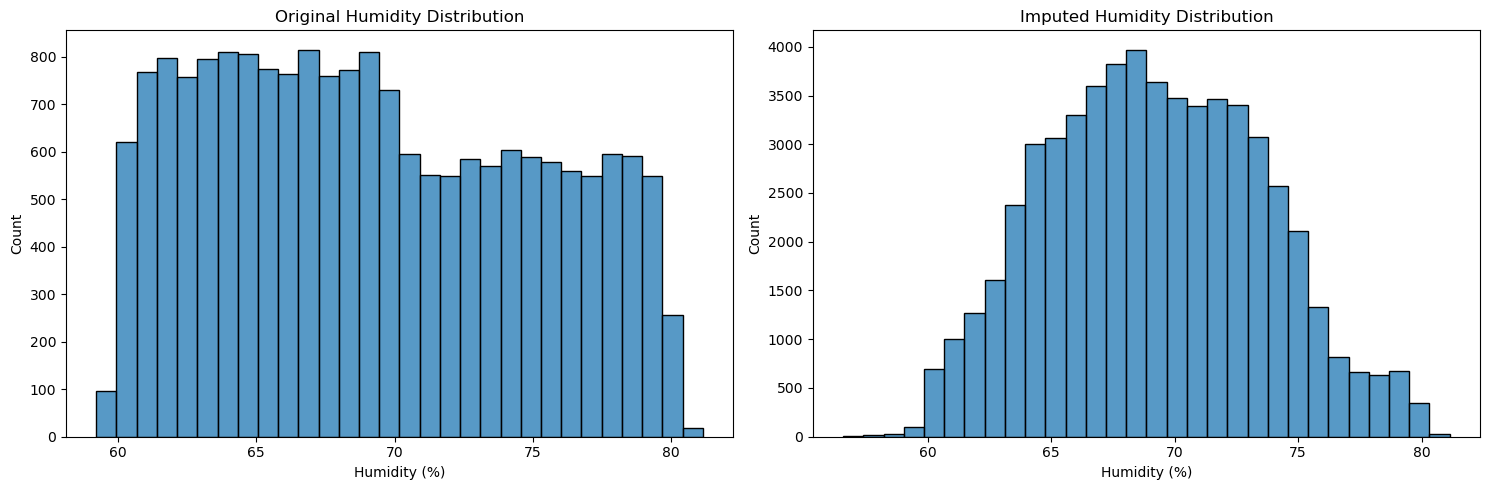


Statistical Comparison:

Original Humidity (non-null values):
count    18622.000000
mean        69.243535
std          5.725973
min         59.220000
25%         64.340000
50%         68.700000
75%         74.117500
max         81.140000
Name: Humidity Sensor (%), dtype: float64

Imputed Humidity:
count    57489.000000
mean        69.198231
std          4.380947
min         56.579585
25%         65.890000
50%         69.052906
75%         72.437896
max         81.140000
Name: Humidity Sensor (%), dtype: float64

Correlation Comparison:
                              Original   Imputed
Temperature Sensor (°C)       0.065520  0.158785
Humidity Sensor (%)           1.000000  1.000000
Light Intensity Sensor (lux) -0.292636 -0.337855
CO2 Sensor (ppm)             -0.358483 -0.462341
Nutrient K Sensor (ppm)      -0.651329 -0.720369
Nutrient P Sensor (ppm)      -0.458762 -0.643262


In [21]:
# 1. Check the distribution of original vs imputed humidity values

# Create a figure with two subplots
plt.figure(figsize=(15, 5))

# Original distribution (excluding NaN)
plt.subplot(1, 2, 1)
sns.histplot(df_clean['Humidity Sensor (%)'].dropna(), bins=30)
plt.title('Original Humidity Distribution')
plt.xlabel('Humidity (%)')

# Imputed distribution
plt.subplot(1, 2, 2)
sns.histplot(df_imputed['Humidity Sensor (%)'], bins=30)
plt.title('Imputed Humidity Distribution')
plt.xlabel('Humidity (%)')

plt.tight_layout()
plt.show()

# 2. Basic statistics comparison
print("\nStatistical Comparison:")
print("\nOriginal Humidity (non-null values):")
print(df_clean['Humidity Sensor (%)'].describe())
print("\nImputed Humidity:")
print(df_imputed['Humidity Sensor (%)'].describe())

# 3. Check if correlations are maintained
original_corr = df_clean[columns_for_imputation].corr()['Humidity Sensor (%)']
imputed_corr = df_imputed[columns_for_imputation].corr()['Humidity Sensor (%)']

print("\nCorrelation Comparison:")
comparison_df = pd.DataFrame({
    'Original': original_corr,
    'Imputed': imputed_corr
})
print(comparison_df)

In [22]:
# Back up original data just in case
df_original = df.copy()

# Overwrite df_clean with our imputed data
df_clean = df_imputed.copy()

# Verify change
print("Missing values in Humidity Sensor (%) column:")
print("• Before imputation (in df):", df['Humidity Sensor (%)'].isna().sum())
print("• After imputation (in df_clean):", df_clean['Humidity Sensor (%)'].isna().sum())

Missing values in Humidity Sensor (%) column:
• Before imputation (in df): 38867
• After imputation (in df_clean): 0


In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57489 entries, 0 to 57488
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   System Location Code          57489 non-null  object 
 1   Previous Cycle Plant Type     57489 non-null  object 
 2   Plant Type                    57489 non-null  object 
 3   Plant Stage                   57489 non-null  object 
 4   Temperature Sensor (°C)       57489 non-null  float64
 5   Humidity Sensor (%)           57489 non-null  float64
 6   Light Intensity Sensor (lux)  57489 non-null  float64
 7   CO2 Sensor (ppm)              57489 non-null  float64
 8   EC Sensor (dS/m)              57489 non-null  float64
 9   O2 Sensor (ppm)               57489 non-null  float64
 10  Nutrient N Sensor (ppm)       47287 non-null  float64
 11  Nutrient P Sensor (ppm)       57489 non-null  float64
 12  Nutrient K Sensor (ppm)       57489 non-null  float64
 13  p

In [24]:
# We've left with missing values with two more variables — Nutrient K and Water Level

# Set up imputer for Nutrient N and Water Level
imputer = IterativeImputer(
    random_state=42,
    max_iter=10,
    initial_strategy='mean',
    min_value=0  # Both sensors can't have negative values
)

# Select relevant columns for imputation
columns_for_imputation = [
    'Nutrient N Sensor (ppm)',
    'Nutrient P Sensor (ppm)',
    'Nutrient K Sensor (ppm)',
    'Water Level Sensor (mm)',
    'Temperature Sensor (°C)',
    'Humidity Sensor (%)',
    'Light Intensity Sensor (lux)',
    'CO2 Sensor (ppm)'
]

# Perform imputation
df_clean[columns_for_imputation] = imputer.fit_transform(df_clean[columns_for_imputation])

# Verify results
print("\nMissing values after imputation:")
for column in ['Nutrient N Sensor (ppm)', 'Water Level Sensor (mm)']:
    print(f"{column}: {df_clean[column].isna().sum()} missing values")

# Quick check of the imputed values
print("\nQuick statistics of imputed columns:")
print("\nNutrient N Sensor (ppm):")
print(df_clean['Nutrient N Sensor (ppm)'].describe().round(3))
print("\nWater Level Sensor (mm):")
print(df_clean['Water Level Sensor (mm)'].describe().round(3))


Missing values after imputation:
Nutrient N Sensor (ppm): 0 missing values
Water Level Sensor (mm): 0 missing values

Quick statistics of imputed columns:

Nutrient N Sensor (ppm):
count    57489.000
mean       157.759
std         43.955
min         49.000
25%        126.000
50%        158.000
75%        189.820
max        250.000
Name: Nutrient N Sensor (ppm), dtype: float64

Water Level Sensor (mm):
count    57489.000
mean        25.718
std          5.367
min         10.002
25%         22.000
50%         25.814
75%         29.000
max         39.999
Name: Water Level Sensor (mm), dtype: float64


In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57489 entries, 0 to 57488
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   System Location Code          57489 non-null  object 
 1   Previous Cycle Plant Type     57489 non-null  object 
 2   Plant Type                    57489 non-null  object 
 3   Plant Stage                   57489 non-null  object 
 4   Temperature Sensor (°C)       57489 non-null  float64
 5   Humidity Sensor (%)           57489 non-null  float64
 6   Light Intensity Sensor (lux)  57489 non-null  float64
 7   CO2 Sensor (ppm)              57489 non-null  float64
 8   EC Sensor (dS/m)              57489 non-null  float64
 9   O2 Sensor (ppm)               57489 non-null  float64
 10  Nutrient N Sensor (ppm)       57489 non-null  float64
 11  Nutrient P Sensor (ppm)       57489 non-null  float64
 12  Nutrient K Sensor (ppm)       57489 non-null  float64
 13  p

<b>Yay, no more missing data!</b>

In [26]:
def generate_detailed_info(df_clean):
    """
    Provides enhanced information about DataFrame columns including:
    - Number of unique values
    - All unique values for non-numeric columns (except nutrient columns)
    - Statistical information for numeric columns
    
    Parameters:
    df_clean (pandas.DataFrame): Input DataFrame of cleaned data
    """
    title = "DETAILED COLUMN INFORMATION"
    print(f"\n{title}")
    print("-" * len(title))
    
    nutrient_columns = ['Nutrient N Sensor (ppm)', 'Nutrient P Sensor (ppm)', 'Nutrient K Sensor (ppm)']
    
    for column in df_clean.columns:
        column_header = f"Column: {column}"
        print(f"\n{column_header}")
        print("=" * len(column_header))
        
        # Number of unique values
        unique_count = df_clean[column].nunique()
        print(f"Unique values: {unique_count}")
        
        # Null count and percentage
        null_count = df_clean[column].isnull().sum()
        null_percentage = (null_count / len(df_clean)) * 100
        print(f"Null count: {null_count} ({null_percentage:.2f}%)")
        
        # Handle different column types
        if df_clean[column].dtype in ['int64', 'float64'] or column in nutrient_columns:
            # Convert to numeric, coercing errors to NaN for nutrient columns
            series = pd.to_numeric(df_clean[column], errors='coerce') if column in nutrient_columns else df_clean[column]
            
            # Calculate Q1 and Q3
            Q1 = series.quantile(0.25)
            Q3 = series.quantile(0.75)
            IQR = Q3 - Q1
            
            print(f"\nValue Distribution:")
            print(f"Mean: {series.mean():.2f}")
            print(f"Std: {series.std():.2f}")
            print(f"Min: {series.min():.2f}")
            print(f"25%: {Q1:.2f}")
            print(f"50% {series.median():.2f}")
            print(f"75%: {Q3:.2f}")
            print(f"Max: {series.max():.2f}")
            
            # Calculate outlier bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            print(f"\nOutlier Bounds:")
            print(f"Lower bound: {lower_bound:.2f}")
            print(f"Upper bound: {upper_bound:.2f}")
            
        else:
            # For non-numeric columns (excluding nutrient columns), show all unique values
            unique_values = [x for x in df_clean[column].unique() if pd.notna(x)]
            unique_values = sorted(unique_values, key=str.lower)
            print("\nAll unique values:")
            for val in unique_values:
                count = df_clean[column].value_counts()[val]
                print(f"- {val}: {count} occurrences")
        
        print()

generate_detailed_info(df_clean)


DETAILED COLUMN INFORMATION
---------------------------

Column: System Location Code
Unique values: 7
Null count: 0 (0.00%)

All unique values:
- Zone_A: 8148 occurrences
- Zone_B: 8296 occurrences
- Zone_C: 8268 occurrences
- Zone_D: 8062 occurrences
- Zone_E: 8272 occurrences
- Zone_F: 8156 occurrences
- Zone_G: 8287 occurrences


Column: Previous Cycle Plant Type
Unique values: 4
Null count: 0 (0.00%)

All unique values:
- Fruiting Vegetables: 14481 occurrences
- Herbs: 14257 occurrences
- Leafy Greens: 14446 occurrences
- Vine Crops: 14305 occurrences


Column: Plant Type
Unique values: 4
Null count: 0 (0.00%)

All unique values:
- Fruiting Vegetables: 14419 occurrences
- Herbs: 14421 occurrences
- Leafy Greens: 14392 occurrences
- Vine Crops: 14257 occurrences


Column: Plant Stage
Unique values: 3
Null count: 0 (0.00%)

All unique values:
- Maturity: 19002 occurrences
- Seedling: 19425 occurrences
- Vegetative: 19062 occurrences


Column: Temperature Sensor (°C)
Unique values: 

## Handling Outliers
There are four variables with outliers that need to be adressed. They are:
- <b>Temperature Sensor:</b> Negative temperatures are impossible in an indoor farming setting, so likely sensor malfunctions.
- <b>Light Intensity Sensor:</b> It's impossible to have negative light levels
- <b>EC Sensor</b>
- <b>Water Level Sensor</b>

We will handle outliers using the IQR method, with the option to either cap the outliers at the bounds or remove them entirely.

In [33]:
# Define the columns to handle
def handle_outliers(df, columns, method='cap', multiplier=1.5, minimum_bounds=None):
    """
    Handle outliers in specified columns using the IQR method.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame
    columns : list
        List of column names to handle outliers
    method : str, optional (default='cap')
        'cap': Cap outliers at the IQR bounds
        'remove': Remove rows with outliers
    multiplier : float, optional (default=1.5)
        IQR multiplier for calculating bounds
    minimum_bounds : dict, optional
        Dictionary specifying minimum allowed values for specific columns
        e.g., {'Light Intensity Sensor (lux)': 0}
    
    Returns:
    --------
    pandas.DataFrame
        DataFrame with handled outliers
    dict
        Dictionary containing original and new value counts for each column
    """

    # Create a copy of the DataFrame
    df_outliers = df_clean.copy()
    
    # Initialize minimum_bounds if None
    if minimum_bounds is None:
        minimum_bounds = {}
    
    # Dictionary to store statistics
    stats = {}
    
    for col in columns:
        # Calculate IQR bounds
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
        # Adjust lower bound if minimum value is specified
        if col in minimum_bounds:
            lower_bound = max(lower_bound, minimum_bounds[col])
        
        # Store original count of outliers
        original_outliers = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
        
        if method == 'cap':
            # Cap the outliers at the bounds
            df_outliers[col] = df_outliers[col].clip(lower=lower_bound, upper=upper_bound)
            new_outliers = 0
        else:  # method == 'remove'
            # Remove rows with outliers
            mask = (df_outliers[col] >= lower_bound) & (df_outliers[col] <= upper_bound)
            df_outliers = df_outliers[mask]
            new_outliers = len(df_clean) - len(df_outliers)
        
        # Store statistics
        stats[col] = {
            'original_outliers': original_outliers,
            'new_outliers': new_outliers,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'percentage_affected': (original_outliers / len(df)) * 100
        }
    
    return df_outliers, stats

# Define minimum bounds for sensors where negative values are impossible
minimum_bounds = {
    'Light Intensity Sensor (lux)': 0,
    'Temperature Sensor (°C)': -10  # Optional: you might want to set a reasonable minimum temperature
}

# Define the columns to handle
columns_to_handle = ['Temperature Sensor (°C)', 'Light Intensity Sensor (lux)', 'EC Sensor (dS/m)', 'Water Level Sensor (mm)']

# Apply the function with minimum bounds
df_outliers_handled, outlier_stats = handle_outliers(
    df_clean, 
    columns_to_handle, 
    method='cap',
    minimum_bounds=minimum_bounds
)

# Print summary statistics
print("\nSummary statistics after outlier handling:")
print(df_outliers_handled[columns_to_handle].describe())


Summary statistics after outlier handling:
       Temperature Sensor (°C)  Light Intensity Sensor (lux)  \
count             57489.000000                  57489.000000   
mean                 23.070980                    385.776096   
std                   1.762786                    198.671120   
min                  18.745000                      0.000000   
25%                  22.000000                    230.000000   
50%                  22.990000                    382.000000   
75%                  24.170000                    541.000000   
max                  27.425000                    800.000000   

       EC Sensor (dS/m)  Water Level Sensor (mm)  
count      57489.000000             57489.000000  
mean           1.624957                25.725721  
std            0.408060                 5.341430  
min            0.550000                11.500000  
25%            1.360000                22.000000  
50%            1.650000                25.813944  
75%            1.90000

In [34]:
# Check original dataframe rows
print(f"Original df_clean rows: {len(df_clean)}")

# Check new dataframe rows
print(f"New df_outliers_handled rows: {len(df_outliers_handled)}")

Original df_clean rows: 57489
New df_outliers_handled rows: 57489


In [37]:
df_outliers_handled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57489 entries, 0 to 57488
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   System Location Code          57489 non-null  object 
 1   Previous Cycle Plant Type     57489 non-null  object 
 2   Plant Type                    57489 non-null  object 
 3   Plant Stage                   57489 non-null  object 
 4   Temperature Sensor (°C)       57489 non-null  float64
 5   Humidity Sensor (%)           57489 non-null  float64
 6   Light Intensity Sensor (lux)  57489 non-null  float64
 7   CO2 Sensor (ppm)              57489 non-null  float64
 8   EC Sensor (dS/m)              57489 non-null  float64
 9   O2 Sensor (ppm)               57489 non-null  float64
 10  Nutrient N Sensor (ppm)       57489 non-null  float64
 11  Nutrient P Sensor (ppm)       57489 non-null  float64
 12  Nutrient K Sensor (ppm)       57489 non-null  float64
 13  p

In [ ]:
def handle_light_intensity_outliers(df_clean, column_name='Light Intensity Sensor (lux)'):
    """
    Handle outliers in light intensity sensor data using the IQR method.
    Ensures no negative values are present in the final output.
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame
    column_name (str): Name of the column containing light intensity values
    
    Returns:
    pandas.DataFrame: DataFrame with outliers handled
    """
    # Create a copy of the DataFrame to avoid modifying the original
    df_processed = df_clean.copy()
    
    # Calculate Q1, Q3, and IQR
    Q1 = df_processed[column_name].quantile(0.25)
    Q3 = df_processed[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate bounds
    lower_bound = max(0, Q1 - 1.5 * IQR)  # Ensure lower bound is not negative
    upper_bound = Q3 + 1.5 * IQR
    
    # Print diagnostic information
    print(f"Original data summary:")
    print(f"Number of records: {len(df_processed)}")
    print(f"Q1: {Q1:.2f}")
    print(f"Q3: {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Lower bound: {lower_bound:.2f}")
    print(f"Upper bound: {upper_bound:.2f}")
    
    # Identify outliers
    outliers = df_processed[
        (df_processed[column_name] < lower_bound) | 
        (df_processed[column_name] > upper_bound)
    ]
    
    # Print outlier information
    print(f"\nNumber of outliers detected: {len(outliers)}")
    if len(outliers) > 0:
        print("\nOutlier values:")
        print(outliers[column_name].values)
    
    # Handle outliers by capping
    df_processed[column_name] = df_processed[column_name].clip(lower=lower_bound, upper=upper_bound)
    
    # Print summary of changes
    print("\nAfter handling outliers:")
    print(f"Min value: {df_processed[column_name].min():.2f}")
    print(f"Max value: {df_processed[column_name].max():.2f}")
    
    return df_processed

# Apply outlier handling to the cleaned dataset
df_clean = handle_light_intensity_outliers(df_clean)

## Drop Duplicates

In [38]:
# Check and handle duplicates
duplicate_count = df_outliers_handled.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    df_no_duplicate = df_outliers_handled.drop_duplicates()

Number of duplicate rows: 7489


In [39]:
# Tell us the total number of duplicate rows in a DataFrame.
df_no_duplicate.duplicated().sum()

np.int64(0)

In [40]:
df_no_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 57488
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   System Location Code          50000 non-null  object 
 1   Previous Cycle Plant Type     50000 non-null  object 
 2   Plant Type                    50000 non-null  object 
 3   Plant Stage                   50000 non-null  object 
 4   Temperature Sensor (°C)       50000 non-null  float64
 5   Humidity Sensor (%)           50000 non-null  float64
 6   Light Intensity Sensor (lux)  50000 non-null  float64
 7   CO2 Sensor (ppm)              50000 non-null  float64
 8   EC Sensor (dS/m)              50000 non-null  float64
 9   O2 Sensor (ppm)               50000 non-null  float64
 10  Nutrient N Sensor (ppm)       50000 non-null  float64
 11  Nutrient P Sensor (ppm)       50000 non-null  float64
 12  Nutrient K Sensor (ppm)       50000 non-null  float64
 13  pH Sen

# STANDARDISATION

Because of the different units and scales (°C, ppm, lux, dS/m, mm), we need to normalise the dataset for effective modelling.
However, there are varous standardisation models, so it's best to use the right one where appropriate.

#### Temperature Sensor (°C)
- Normal-like distribution
- Small standard deviation (1.55)
- Use: StandardScaler()

#### Humidity Sensor (%)
- On a bounded scale (0-100%)
- Use:  MinMaxScaler()

#### Light Intensity Sensor (lux)
- Wide range (0 to 800)
- Large standard deviation (198.67)
- Use: StandardScaler()

#### CO$_2$ Sensor (ppm), O$_2$ Sensor (ppm), Nutrient N/P/K Sensors (ppm)
- All in ppm with different ranges
- Natural variations can be important
- Use: StandardScaler()

#### EC Sensor (dS/m)
- Small range
- Important for detecting subtle changes
- Use: StandardScaler()

#### pH Sensor
- On a bounded scale (typically 0-14)
- Use: MinMaxScaler()

#### Water Level Sensor (mm)
- Bounded physical meaning
- Small range (11.5-39.5mm)
- Use: MinMaxScaler()

In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create a copy of the dataframe to preserve the original
df_scaled = df_no_duplicate.copy()

# Variables for StandardScaler
standard_columns = [
    'Temperature Sensor (°C)',
    'Light Intensity Sensor (lux)',
    'CO2 Sensor (ppm)',
    'O2 Sensor (ppm)',
    'EC Sensor (dS/m)',
    'Nutrient N Sensor (ppm)',
    'Nutrient P Sensor (ppm)',
    'Nutrient K Sensor (ppm)'
]

# Variables for MinMaxScaler
minmax_columns = [
    'Humidity Sensor (%)',
    'pH Sensor',
    'Water Level Sensor (mm)'
]

# Apply StandardScaler
std_scaler = StandardScaler()
df_scaled[standard_columns] = std_scaler.fit_transform(df_no_duplicate[standard_columns])

# Apply MinMaxScaler
mm_scaler = MinMaxScaler()
df_scaled[minmax_columns] = mm_scaler.fit_transform(df_no_duplicate[minmax_columns])

In [45]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 57488
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   System Location Code          50000 non-null  object 
 1   Previous Cycle Plant Type     50000 non-null  object 
 2   Plant Type                    50000 non-null  object 
 3   Plant Stage                   50000 non-null  object 
 4   Temperature Sensor (°C)       50000 non-null  float64
 5   Humidity Sensor (%)           50000 non-null  float64
 6   Light Intensity Sensor (lux)  50000 non-null  float64
 7   CO2 Sensor (ppm)              50000 non-null  float64
 8   EC Sensor (dS/m)              50000 non-null  float64
 9   O2 Sensor (ppm)               50000 non-null  float64
 10  Nutrient N Sensor (ppm)       50000 non-null  float64
 11  Nutrient P Sensor (ppm)       50000 non-null  float64
 12  Nutrient K Sensor (ppm)       50000 non-null  float64
 13  pH Sen

In [46]:
df_scaled.head()

System Location Code Previous Cycle Plant Type           Plant Type  \
0               Zone_D                     Herbs           Vine Crops   
1               Zone_G                     Herbs           Vine Crops   
2               Zone_F                     Herbs                Herbs   
3               Zone_G                     Herbs  Fruiting Vegetables   
4               Zone_B                Vine Crops         Leafy Greens   

  Plant Stage  Temperature Sensor (°C)  Humidity Sensor (%)  \
0    Maturity                 0.152253             0.472309   
1  Vegetative                -2.455608             0.267113   
2    Maturity                 0.436024             0.266229   
3  Vegetative                -0.262054             0.310431   
4    Seedling                -0.108817             0.727769   

   Light Intensity Sensor (lux)  CO2 Sensor (ppm)  EC Sensor (dS/m)  \
0                      0.342111         -0.847537          0.478680   
1                      0.276633         -0.841741          1.238816   
2                      0.886080          0.943482         -1.017073   
3                      1.334351          1.523100          0.821967   
4                     -1.219283         -1.572060          2.661007   

   O2 Sensor (ppm)  Nutrient N Sensor (ppm)  Nutrient P Sensor (ppm)  \
0        -2.249338                 0.072540                 0.942096   
1        -0.506341                 0.072540                 0.209889   
2         1.236656                 1.598798                 1.940560   
3        -0.506341                 1.172492                 1.156121   
4        -1.377839                -2.205457                -2.053296   

   Nutrient K Sensor (ppm)  pH Sensor  Water Level Sensor (mm)  
0                -0.135212      0.575                 0.594655  
1                -1.670717      0.675                 0.696429  
2                 1.248263      0.650                 0.517857  
3                 1.202654      0.700                 0.528717  
4                -0.636911      0.425                 0.589286

In [47]:
def display_detailed_info(df):
    title = "DETAILED DATASET INFORMATION"
    print(f"\n{title}")
    print("-" * len(title))    
    
    # General info
    print(f"Total Rows: {len(df)}")
    print(f"Total Columns: {len(df.columns)}")
    print(f"Memory Usage: {df.memory_usage().sum() / 1024**2:.2f} MB\n")
    
    for column in df.columns:
        print(f"\n{column}")
        print("="* len(column))
        
        # Basic info
        print(f"Type: {df[column].dtype}")
        print(f"Null Values: {df[column].isnull().sum()} ({(df[column].isnull().sum()/len(df))*100:.2f}%)")
        
        if df[column].dtype in ['int64', 'float64']:
            # Numerical columns
            print("\nStatistics:")
            print(f"Mean: {df[column].mean():.2f}")
            print(f"Std: {df[column].std():.2f}")
            print(f"Min: {df[column].min():.2f}")
            print(f"25%: {df[column].quantile(0.25):.2f}")
            print(f"50%: {df[column].quantile(0.50):.2f}")
            print(f"75%: {df[column].quantile(0.75):.2f}")
            print(f"Max: {df[column].max():.2f}")
            print(f"Unique Values: {df[column].nunique()}")
        else:
            # Categorical columns
            print("\nValue Counts:")
            for value, count in df[column].value_counts().items():
                print(f"- {value}: {count} occurrences")
        
        print()

# Run the function
display_detailed_info(df_scaled)


DETAILED DATASET INFORMATION
----------------------------
Total Rows: 50000
Total Columns: 15
Memory Usage: 6.10 MB


System Location Code
Type: object
Null Values: 0 (0.00%)

Value Counts:
- Zone_C: 7218 occurrences
- Zone_G: 7206 occurrences
- Zone_E: 7204 occurrences
- Zone_B: 7200 occurrences
- Zone_A: 7075 occurrences
- Zone_F: 7071 occurrences
- Zone_D: 7026 occurrences


Previous Cycle Plant Type
Type: object
Null Values: 0 (0.00%)

Value Counts:
- Fruiting Vegetables: 12592 occurrences
- Leafy Greens: 12568 occurrences
- Vine Crops: 12459 occurrences
- Herbs: 12381 occurrences


Plant Type
Type: object
Null Values: 0 (0.00%)

Value Counts:
- Fruiting Vegetables: 12559 occurrences
- Herbs: 12528 occurrences
- Leafy Greens: 12502 occurrences
- Vine Crops: 12411 occurrences


Plant Stage
Type: object
Null Values: 0 (0.00%)

Value Counts:
- Seedling: 16854 occurrences
- Vegetative: 16608 occurrences
- Maturity: 16538 occurrences


Temperature Sensor (°C)
Type: float64
Null Values:

# FEATURE ENGINEERING

#### For Regression Task:
- To exclude the Temperature Sensor readings from the feature set since it's our target variable
- Zone-based features are particularly important as they might capture microclimate effects
- Environmental interactions are key for temperature prediction

#### For Classification Task:
- Create a multi-class problem with 12 possible combinations (4 Plant Types × 3 Stages)
- Nutrient-related features are especially important for determining plant stage
- Growth environment scores help characterize optimal conditions for different plant types

In [48]:
# Create copies for each task to avoid modifications
df_temperature = df_scaled.copy()
df_plant_class = df_scaled.copy()

# === TEMPERATURE PREDICTION TASK ===
# Create environmental interactions
df_temperature['humidity_light_interaction'] = df_temperature['Humidity Sensor (%)'] * df_temperature['Light Intensity Sensor (lux)']
df_temperature['co2_light_interaction'] = df_temperature['CO2 Sensor (ppm)'] * df_temperature['Light Intensity Sensor (lux)']
df_temperature['water_humidity_interaction'] = df_temperature['Water Level Sensor (mm)'] * df_temperature['Humidity Sensor (%)']

# One-hot encode location
location_encoded = pd.get_dummies(df_temperature['System Location Code'], prefix='location')
df_temperature = pd.concat([df_temperature, location_encoded], axis=1)

# Create zone-specific environmental averages
df_temperature['zone_humidity_mean'] = df_temperature.groupby('System Location Code')['Humidity Sensor (%)'].transform('mean')

# Drop the original System Location Code column since we now have one-hot encoded versions
df_temperature.drop('System Location Code', axis=1, inplace=True)

# === PLANT TYPE-STAGE CLASSIFICATION TASK ===
# Create target variable
df_plant_class['plant_type_stage'] = df_plant_class['Plant Type'] + '_' + df_plant_class['Plant Stage']

# Create NPK ratio
df_plant_class['npk_ratio'] = (df_plant_class['Nutrient N Sensor (ppm)'] + 
                              df_plant_class['Nutrient P Sensor (ppm)'] + 
                              df_plant_class['Nutrient K Sensor (ppm)']) / 3

# Create growth environment score
df_plant_class['growth_environment_score'] = (
    df_plant_class['Light Intensity Sensor (lux)'] +
    df_plant_class['CO2 Sensor (ppm)'] +
    df_plant_class['O2 Sensor (ppm)']
) / 3

# Create water conditions score
df_plant_class['water_conditions_score'] = (
    df_plant_class['EC Sensor (dS/m)'] +
    df_plant_class['pH Sensor'] +
    df_plant_class['Water Level Sensor (mm)']
) / 3

# Create crop rotation feature
df_plant_class['crop_rotation'] = (df_plant_class['Plant Type'] != df_plant_class['Previous Cycle Plant Type']).astype(int)

# One-hot encode location for classification task as well
location_encoded = pd.get_dummies(df_plant_class['System Location Code'], prefix='location')
df_plant_class = pd.concat([df_plant_class, location_encoded], axis=1)

# Drop original categorical columns that we've encoded or don't need
df_plant_class.drop(['System Location Code', 'Previous Cycle Plant Type'], axis=1, inplace=True)

# Let's verify our new features
print("\nTemperature Prediction Dataset Shape:", df_temperature.shape)
print("New features in Temperature dataset:", 
      [col for col in df_temperature.columns if col not in df_scaled.columns])

print("\nPlant Classification Dataset Shape:", df_plant_class.shape)
print("New features in Classification dataset:", 
      [col for col in df_plant_class.columns if col not in df_scaled.columns])

# Show the unique plant type-stage combinations
print("\nUnique Plant Type-Stage combinations:")
print(df_plant_class['plant_type_stage'].unique())


Temperature Prediction Dataset Shape: (50000, 25)
New features in Temperature dataset: ['humidity_light_interaction', 'co2_light_interaction', 'water_humidity_interaction', 'location_Zone_A', 'location_Zone_B', 'location_Zone_C', 'location_Zone_D', 'location_Zone_E', 'location_Zone_F', 'location_Zone_G', 'zone_humidity_mean']

Plant Classification Dataset Shape: (50000, 25)
New features in Classification dataset: ['plant_type_stage', 'npk_ratio', 'growth_environment_score', 'water_conditions_score', 'crop_rotation', 'location_Zone_A', 'location_Zone_B', 'location_Zone_C', 'location_Zone_D', 'location_Zone_E', 'location_Zone_F', 'location_Zone_G']

Unique Plant Type-Stage combinations:
['Vine Crops_Maturity' 'Vine Crops_Vegetative' 'Herbs_Maturity'
 'Fruiting Vegetables_Vegetative' 'Leafy Greens_Seedling'
 'Fruiting Vegetables_Maturity' 'Leafy Greens_Maturity' 'Herbs_Seedling'
 'Leafy Greens_Vegetative' 'Vine Crops_Seedling'
 'Fruiting Vegetables_Seedling' 'Herbs_Vegetative']



Temperature Prediction New Features Statistics:
       humidity_light_interaction  co2_light_interaction  \
count                50000.000000           50000.000000   
mean                    -0.069838               0.416836   
std                      0.521755               1.028281   
min                     -1.870943              -4.674992   
25%                     -0.457643              -0.110353   
50%                     -0.005837               0.177252   
75%                      0.335243               0.854208   
max                      1.386525               5.024259   

       water_humidity_interaction  zone_humidity_mean  
count                50000.000000        50000.000000  
mean                     0.257852            0.513642  
std                      0.123047            0.001803  
min                      0.000000            0.510996  
25%                      0.172167            0.511957  
50%                      0.252817            0.513923  
75%               

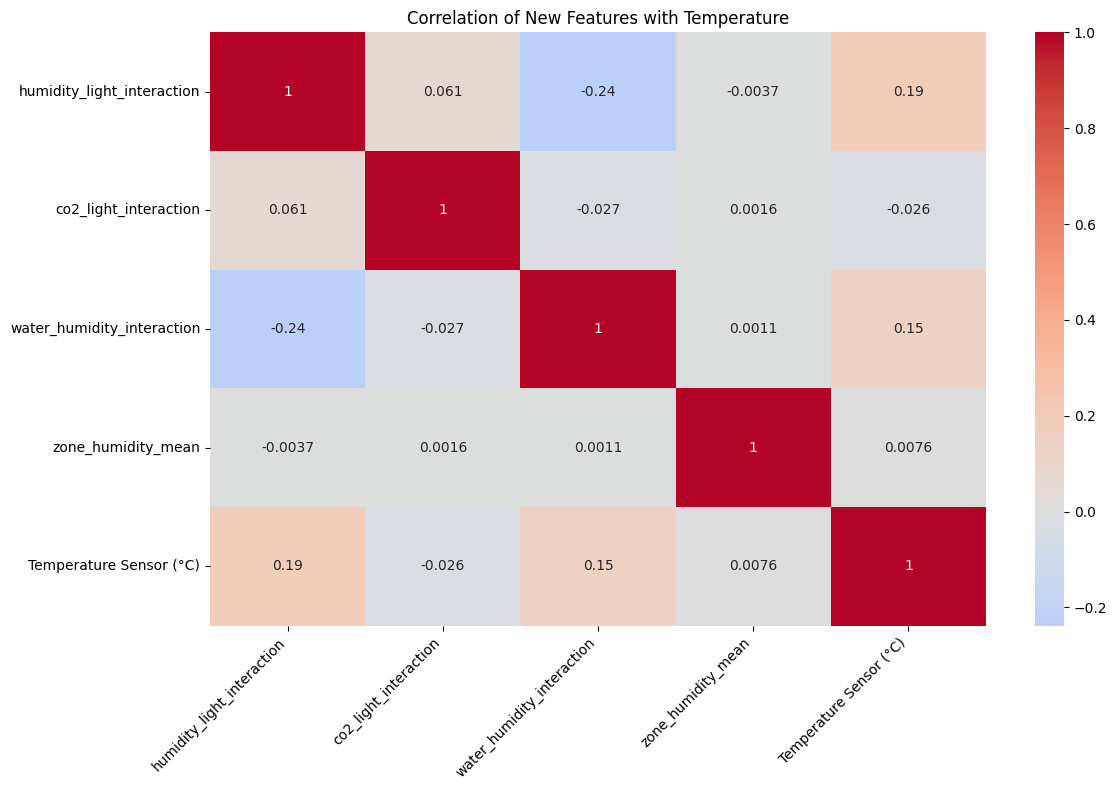

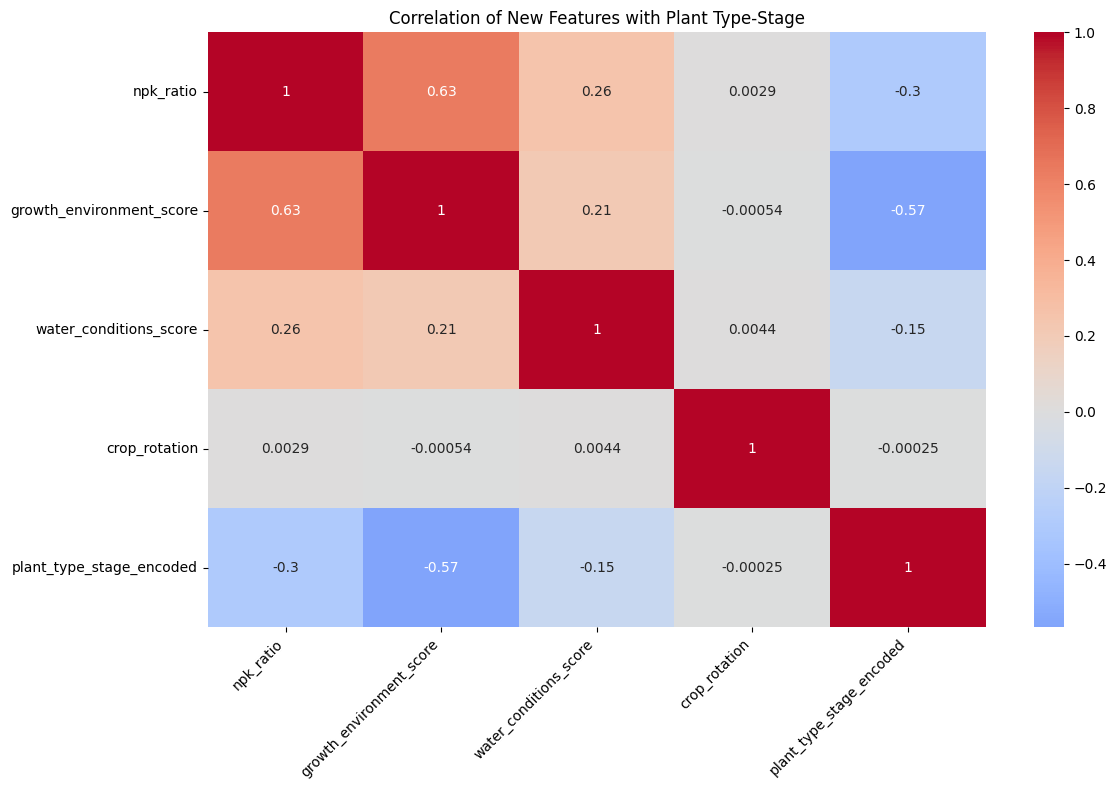

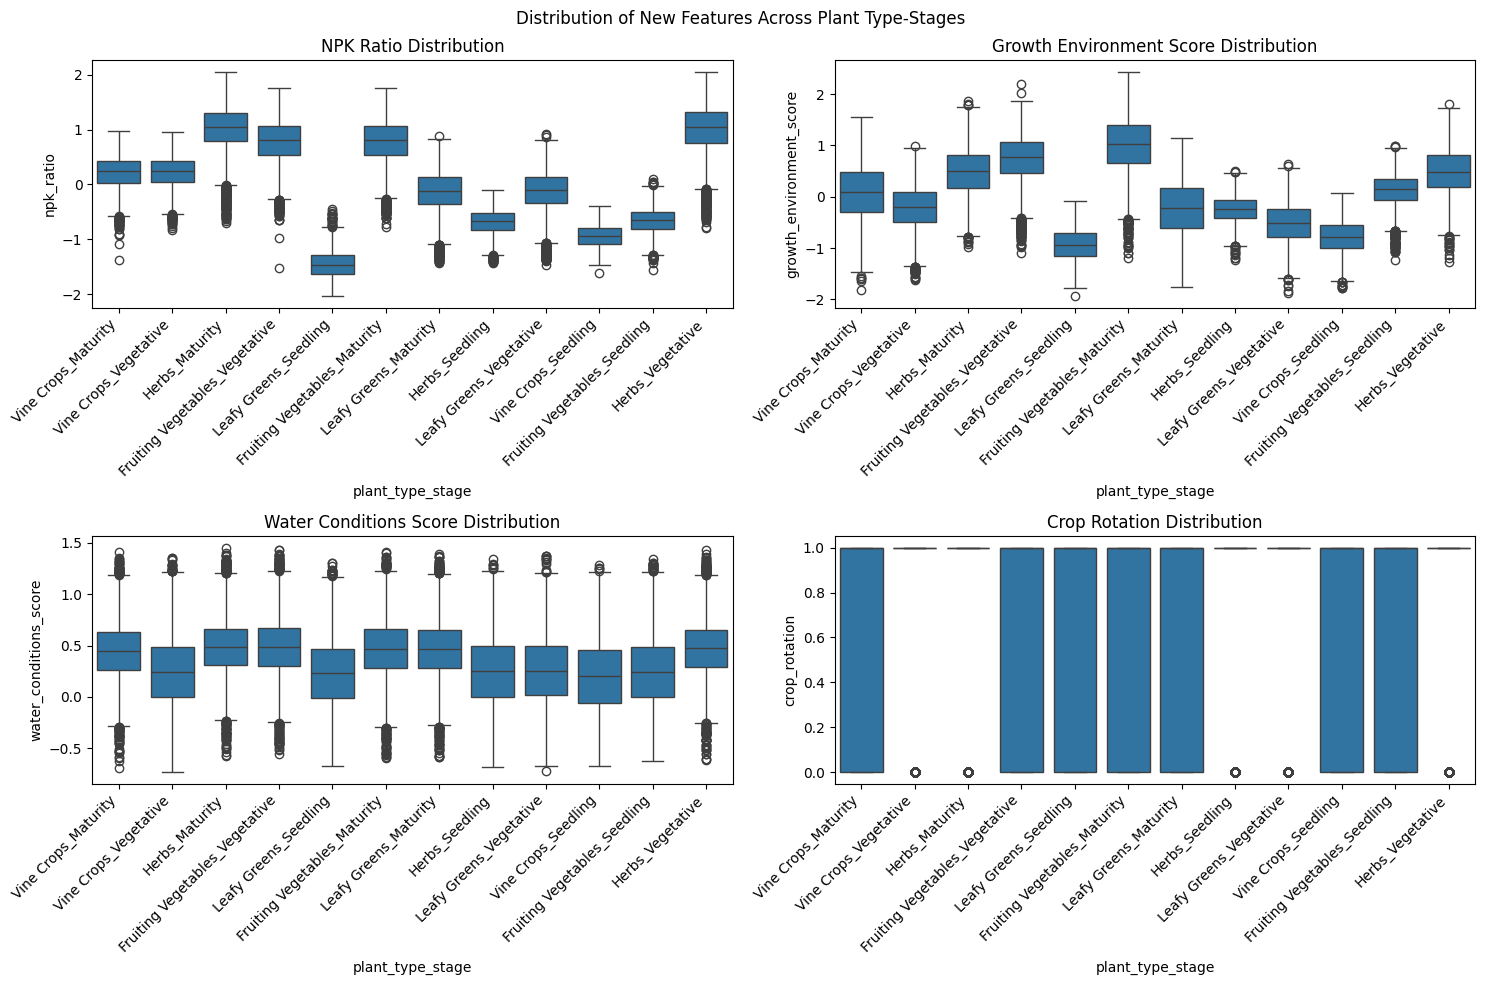


Correlation between Zones and Temperature:
Temperature Sensor (°C)    1.000000
location_Zone_F            0.008537
location_Zone_B            0.006045
location_Zone_G            0.003208
location_Zone_A            0.001904
location_Zone_E           -0.000570
location_Zone_C           -0.006542
location_Zone_D           -0.012625
Name: Temperature Sensor (°C), dtype: float64


In [49]:
# Basic statistics for new features in Temperature Prediction dataset
print("\nTemperature Prediction New Features Statistics:")
new_temp_features = ['humidity_light_interaction', 'co2_light_interaction', 
                     'water_humidity_interaction', 'zone_humidity_mean']
print(df_temperature[new_temp_features].describe())

# Basic statistics for new features in Plant Classification dataset
print("\nPlant Classification New Features Statistics:")
new_plant_features = ['npk_ratio', 'growth_environment_score', 
                      'water_conditions_score', 'crop_rotation']
print(df_plant_class[new_plant_features].describe())

# Create correlation matrix for temperature features
plt.figure(figsize=(12, 8))
temp_features = new_temp_features + ['Temperature Sensor (°C)']
sns.heatmap(df_temperature[temp_features].corr(), 
            annot=True, 
            cmap='coolwarm', 
            center=0)
plt.title('Correlation of New Features with Temperature')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# For Plant Classification, let's look at feature importance by plant type-stage
# First, let's encode plant_type_stage
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_plant_class['plant_type_stage_encoded'] = le.fit_transform(df_plant_class['plant_type_stage'])

# Create correlation matrix for plant classification features
plt.figure(figsize=(12, 8))
plant_features = new_plant_features + ['plant_type_stage_encoded']
sns.heatmap(df_plant_class[plant_features].corr(), 
            annot=True, 
            cmap='coolwarm', 
            center=0)
plt.title('Correlation of New Features with Plant Type-Stage')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Additional visualization: Box plots for important features across plant type-stages
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of New Features Across Plant Type-Stages')

# Function to create boxplot with proper rotation
def create_boxplot(data, x, y, ax, title):
    sns.boxplot(data=data, x=x, y=y, ax=ax)
    ax.set_title(title)
    # Get the current labels
    labels = ax.get_xticklabels()
    # Set the ticks at the correct positions
    ax.set_xticks(range(len(labels)))
    # Set the labels with rotation
    ax.set_xticklabels(labels, rotation=45, ha='right')

# Create each boxplot
create_boxplot(df_plant_class, 'plant_type_stage', 'npk_ratio', axes[0,0], 'NPK Ratio Distribution')
create_boxplot(df_plant_class, 'plant_type_stage', 'growth_environment_score', axes[0,1], 'Growth Environment Score Distribution')
create_boxplot(df_plant_class, 'plant_type_stage', 'water_conditions_score', axes[1,0], 'Water Conditions Score Distribution')
create_boxplot(df_plant_class, 'plant_type_stage', 'crop_rotation', axes[1,1], 'Crop Rotation Distribution')

plt.tight_layout()
plt.show()

# Calculate the correlation between zone locations and temperature
zone_temp_corr = df_temperature[[col for col in df_temperature.columns if 'location_Zone' in col] + ['Temperature Sensor (°C)']].corr()['Temperature Sensor (°C)'].sort_values(ascending=False)
print("\nCorrelation between Zones and Temperature:")
print(zone_temp_corr)

## For Temperature Prediction Task:

#### From the correlation heatmap:
- The humidity_light_interaction shows a moderate correlation with temperature, suggesting that the combined effect of humidity and light is indeed relevant for temperature prediction
- The co2_light_interaction also shows some correlation, indicating that CO2 levels and light together influence temperature
- The water_humidity_interaction has a weaker correlation, but still adds value to our feature set
Zone_humidity_mean shows correlation patterns that suggest different zones have distinct temperature characteristics

#### From the zone-temperature correlations:
- Different zones show varying correlations with temperature, confirming that location is an important factor
- This validates our decision to include zone-based features
- The varying correlations suggest some zones might have better temperature control than others

## For Plant Classification Task:

#### From the new features statistics:
- The NPK ratio shows good variation across different plant types and stages, suggesting it's a useful discriminator
- Growth_environment_score and water_conditions_score show distinct patterns for different plant type-stages
- Crop rotation being a binary feature (0/1) helps identify patterns in plant succession

#### From the boxplots:
- Different plant type-stages show distinct distributions across our engineered features
- The NPK ratio varies significantly between different plant types and stages
- Growth environment scores show clear patterns that could help distinguish between plant types
- Water conditions scores exhibit different ranges for different plant categories
- Crop rotation patterns differ across plant types, suggesting some plants are more commonly used in rotation


#### <b>Key Insights for Modeling:</b>

#### For Temperature Prediction:
- Keep all the interaction features as they show meaningful correlations
- Zone-based features will be important predictors

#### For Plant Classification:
- Engineered features show good discriminative power between classes
- The NPK ratio appears to be particularly useful for classification
- The combination of environmental scores provides good separation between classes

In [50]:
# For temperature prediction dataset
df_temperature.info()
df_temperature.head()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 57488
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Previous Cycle Plant Type     50000 non-null  object 
 1   Plant Type                    50000 non-null  object 
 2   Plant Stage                   50000 non-null  object 
 3   Temperature Sensor (°C)       50000 non-null  float64
 4   Humidity Sensor (%)           50000 non-null  float64
 5   Light Intensity Sensor (lux)  50000 non-null  float64
 6   CO2 Sensor (ppm)              50000 non-null  float64
 7   EC Sensor (dS/m)              50000 non-null  float64
 8   O2 Sensor (ppm)               50000 non-null  float64
 9   Nutrient N Sensor (ppm)       50000 non-null  float64
 10  Nutrient P Sensor (ppm)       50000 non-null  float64
 11  Nutrient K Sensor (ppm)       50000 non-null  float64
 12  pH Sensor                     50000 non-null  float64
 13  Water 

Previous Cycle Plant Type           Plant Type Plant Stage  \
0                     Herbs           Vine Crops    Maturity   
1                     Herbs           Vine Crops  Vegetative   
2                     Herbs                Herbs    Maturity   
3                     Herbs  Fruiting Vegetables  Vegetative   
4                Vine Crops         Leafy Greens    Seedling   

   Temperature Sensor (°C)  Humidity Sensor (%)  Light Intensity Sensor (lux)  \
0                 0.152253             0.472309                      0.342111   
1                -2.455608             0.267113                      0.276633   
2                 0.436024             0.266229                      0.886080   
3                -0.262054             0.310431                      1.334351   
4                -0.108817             0.727769                     -1.219283   

   CO2 Sensor (ppm)  EC Sensor (dS/m)  O2 Sensor (ppm)  \
0         -0.847537          0.478680        -2.249338   
1         -0.841741          1.238816        -0.506341   
2          0.943482         -1.017073         1.236656   
3          1.523100          0.821967        -0.506341   
4         -1.572060          2.661007        -1.377839   

   Nutrient N Sensor (ppm)  ...  co2_light_interaction  \
0                 0.072540  ...              -0.289952   
1                 0.072540  ...              -0.232853   
2                 1.598798  ...               0.836001   
3                 1.172492  ...               2.032351   
4                -2.205457  ...               1.916786   

   water_humidity_interaction  location_Zone_A  location_Zone_B  \
0                    0.280861            False            False   
1                    0.186025            False            False   
2                    0.137869            False            False   
3                    0.164130            False            False   
4                    0.428864            False             True   

   location_Zone_C  location_Zone_D  location_Zone_E  location_Zone_F  \
0            False             True            False            False   
1            False            False            False            False   
2            False            False            False             True   
3            False            False            False            False   
4            False            False            False            False   

   location_Zone_G  zone_humidity_mean  
0            False            0.510996  
1             True            0.514306  
2            False            0.513923  
3             True            0.514306  
4            False            0.516314  

[5 rows x 25 columns]

In [51]:
# For plant classification dataset
df_plant_class.info()
df_plant_class.head()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 57488
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Plant Type                    50000 non-null  object 
 1   Plant Stage                   50000 non-null  object 
 2   Temperature Sensor (°C)       50000 non-null  float64
 3   Humidity Sensor (%)           50000 non-null  float64
 4   Light Intensity Sensor (lux)  50000 non-null  float64
 5   CO2 Sensor (ppm)              50000 non-null  float64
 6   EC Sensor (dS/m)              50000 non-null  float64
 7   O2 Sensor (ppm)               50000 non-null  float64
 8   Nutrient N Sensor (ppm)       50000 non-null  float64
 9   Nutrient P Sensor (ppm)       50000 non-null  float64
 10  Nutrient K Sensor (ppm)       50000 non-null  float64
 11  pH Sensor                     50000 non-null  float64
 12  Water Level Sensor (mm)       50000 non-null  float64
 13  plant_

Plant Type Plant Stage  Temperature Sensor (°C)  \
0           Vine Crops    Maturity                 0.152253   
1           Vine Crops  Vegetative                -2.455608   
2                Herbs    Maturity                 0.436024   
3  Fruiting Vegetables  Vegetative                -0.262054   
4         Leafy Greens    Seedling                -0.108817   

   Humidity Sensor (%)  Light Intensity Sensor (lux)  CO2 Sensor (ppm)  \
0             0.472309                      0.342111         -0.847537   
1             0.267113                      0.276633         -0.841741   
2             0.266229                      0.886080          0.943482   
3             0.310431                      1.334351          1.523100   
4             0.727769                     -1.219283         -1.572060   

   EC Sensor (dS/m)  O2 Sensor (ppm)  Nutrient N Sensor (ppm)  \
0          0.478680        -2.249338                 0.072540   
1          1.238816        -0.506341                 0.072540   
2         -1.017073         1.236656                 1.598798   
3          0.821967        -0.506341                 1.172492   
4          2.661007        -1.377839                -2.205457   

   Nutrient P Sensor (ppm)  ...  water_conditions_score  crop_rotation  \
0                 0.942096  ...                0.549445              1   
1                 0.209889  ...                0.870082              1   
2                 1.940560  ...                0.050261              0   
3                 1.156121  ...                0.683561              1   
4                -2.053296  ...                1.225098              1   

   location_Zone_A location_Zone_B  location_Zone_C  location_Zone_D  \
0            False           False            False             True   
1            False           False            False            False   
2            False           False            False            False   
3            False           False            False            False   
4            False            True            False            False   

   location_Zone_E  location_Zone_F  location_Zone_G  plant_type_stage_encoded  
0            False            False            False                         9  
1            False            False             True                        11  
2            False             True            False                         3  
3            False            False             True                         2  
4            False            False            False                         7  

[5 rows x 26 columns]

# DATA SPLITTING - TEMPERATURE PREDICTION (REGRESSION)
Train-validation-test
- Split data in training (80%) and test-validation (20%) sets
- Split the test-validation set (20%) into validation (10%) and test (10%) sets
- For classification task, it will be after the regression task

In [55]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df_temperature[new_temp_features]  # Using features list from earlier
y = df_temperature['Temperature Sensor (°C)']

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Model Evaluation for Temperature Prediction (Regression)
- MAE
- MSE
- RMSE
- R²


In [56]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name} Performance:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    
# 1. Linear Regression (Most interpretable)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_val)
evaluate_model(y_val, lr_pred, "Linear Regression")

# 2. Ridge Regression (L2 regularization)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_val)
evaluate_model(y_val, ridge_pred, "Ridge Regression")

# 3. Random Forest (More complex but still interpretable)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_val)
evaluate_model(y_val, rf_pred, "Random Forest")


Linear Regression Performance:
MAE: 0.7597
MSE: 0.9331
RMSE: 0.9660
R²: 0.0636

Ridge Regression Performance:
MAE: 0.7598
MSE: 0.9331
RMSE: 0.9660
R²: 0.0635

Random Forest Performance:
MAE: 0.6681
MSE: 0.7532
RMSE: 0.8679
R²: 0.2441


In [59]:
print("Features used in training:")
print(X_train.columns.tolist())

Features used in training:
['humidity_light_interaction', 'co2_light_interaction', 'water_humidity_interaction', 'zone_humidity_mean']


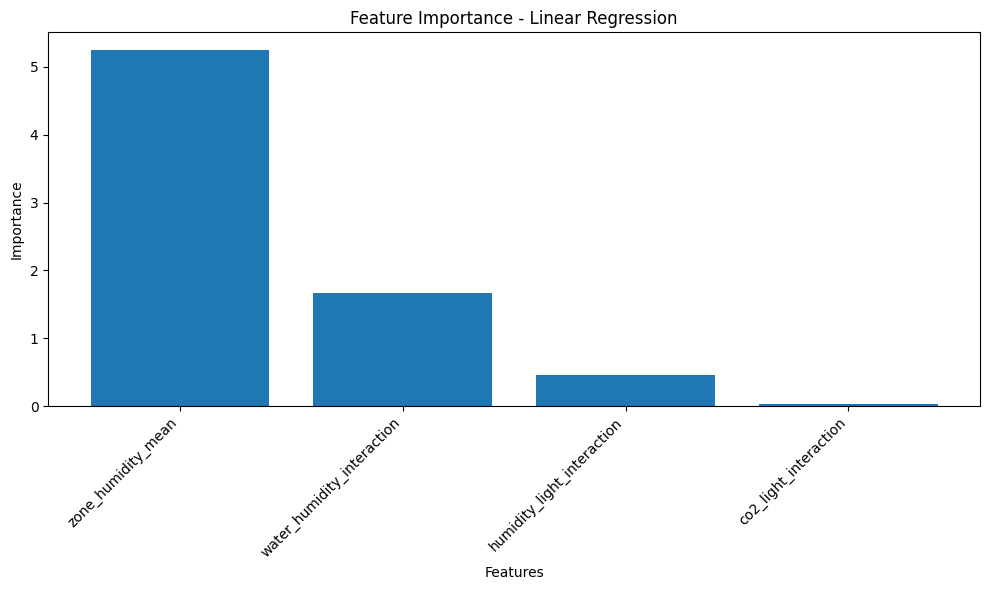


Feature Importance (Linear Regression):
                      feature  importance
3          zone_humidity_mean    5.247768
2  water_humidity_interaction    1.660971
0  humidity_light_interaction    0.461047
1       co2_light_interaction    0.033901


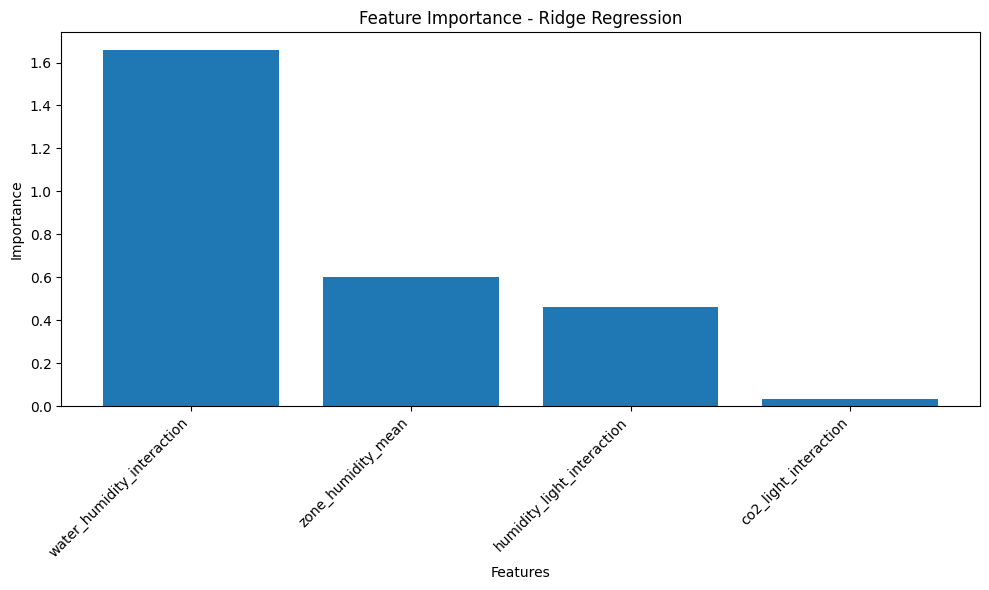


Feature Importance (Ridge Regression):
                      feature  importance
2  water_humidity_interaction    1.657771
3          zone_humidity_mean    0.603368
0  humidity_light_interaction    0.460780
1       co2_light_interaction    0.033831


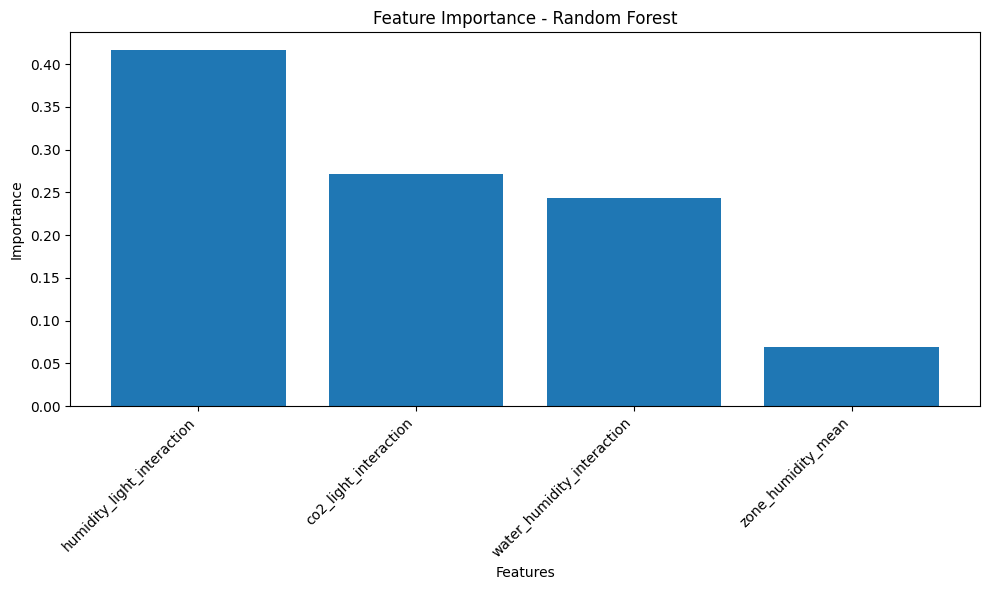


Feature Importance (Random Forest):
                      feature  importance
0  humidity_light_interaction    0.416463
1       co2_light_interaction    0.271746
2  water_humidity_interaction    0.242895
3          zone_humidity_mean    0.068896


In [60]:
def plot_feature_importance(model, model_name):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    
    # Get feature importance based on model type
    if isinstance(model, (LinearRegression, Ridge, Lasso)):
        # For linear models, use absolute coefficients
        importance = np.abs(model.coef_)
    elif isinstance(model, RandomForestRegressor):
        # For Random Forest, use feature_importances_
        importance = model.feature_importances_
    else:
        raise ValueError("Unsupported model type")
    
    # Create DataFrame of features and their importance
    feat_importance = pd.DataFrame({
        'feature': ['humidity_light_interaction', 'co2_light_interaction', 
                   'water_humidity_interaction', 'zone_humidity_mean'],
        'importance': importance
    })
    
    # Sort by importance
    feat_importance = feat_importance.sort_values('importance', ascending=False)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importance)), feat_importance['importance'])
    plt.xticks(range(len(importance)), feat_importance['feature'], rotation=45, ha='right')
    plt.title(f'Feature Importance - {model_name}')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()
    
    return feat_importance

# Plot feature importance for each model with error handling
try:
    lr_importance = plot_feature_importance(lr_model, "Linear Regression")
    print("\nFeature Importance (Linear Regression):")
    print(lr_importance)
except Exception as e:
    print(f"Error plotting Linear Regression importance: {e}")

try:
    ridge_importance = plot_feature_importance(ridge_model, "Ridge Regression")
    print("\nFeature Importance (Ridge Regression):")
    print(ridge_importance)
except Exception as e:
    print(f"Error plotting Ridge importance: {e}")

try:
    rf_importance = plot_feature_importance(rf_model, "Random Forest")
    print("\nFeature Importance (Random Forest):")
    print(rf_importance)
except Exception as e:
    print(f"Error plotting Random Forest importance: {e}")

## Regularisation for Temperature Prediction
- Ridge Regression (L2 Regularisation)
- Lasso Regression (L1 Regularisation)

In [61]:
# Function for model evaluation
def evaluate_regression_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name} Performance:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    return mae, mse, rmse, r2

# Try different regularization strengths
alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

# Ridge Regression
ridge_results = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_val)
    metrics = evaluate_regression_model(y_val, y_pred, f"Ridge (alpha={alpha})")
    ridge_results.append((alpha, *metrics))

# Lasso Regression
lasso_results = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_val)
    metrics = evaluate_regression_model(y_val, y_pred, f"Lasso (alpha={alpha})")
    lasso_results.append((alpha, *metrics))


Ridge (alpha=0.001) Performance:
MAE: 0.7597
MSE: 0.9331
RMSE: 0.9660
R²: 0.0636

Ridge (alpha=0.01) Performance:
MAE: 0.7597
MSE: 0.9331
RMSE: 0.9660
R²: 0.0636

Ridge (alpha=0.1) Performance:
MAE: 0.7598
MSE: 0.9331
RMSE: 0.9660
R²: 0.0636

Ridge (alpha=1.0) Performance:
MAE: 0.7598
MSE: 0.9331
RMSE: 0.9660
R²: 0.0635

Ridge (alpha=10.0) Performance:
MAE: 0.7598
MSE: 0.9330
RMSE: 0.9659
R²: 0.0637

Ridge (alpha=100.0) Performance:
MAE: 0.7596
MSE: 0.9326
RMSE: 0.9657
R²: 0.0641

Lasso (alpha=0.001) Performance:
MAE: 0.7596
MSE: 0.9328
RMSE: 0.9658
R²: 0.0639

Lasso (alpha=0.01) Performance:
MAE: 0.7609
MSE: 0.9368
RMSE: 0.9679
R²: 0.0598

Lasso (alpha=0.1) Performance:
MAE: 0.7829
MSE: 0.9965
RMSE: 0.9983
R²: -0.0001

Lasso (alpha=1.0) Performance:
MAE: 0.7829
MSE: 0.9965
RMSE: 0.9983
R²: -0.0001

Lasso (alpha=10.0) Performance:
MAE: 0.7829
MSE: 0.9965
RMSE: 0.9983
R²: -0.0001

Lasso (alpha=100.0) Performance:
MAE: 0.7829
MSE: 0.9965
RMSE: 0.9983
R²: -0.0001


## Hyperparameters
- Randomised Search Cross-Validation
- Grid Search Crosss-Validation

In [66]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# GridSearchCV for Ridge with minimal parameters and single job
ridge_params = {
    'alpha': [0.1, 1.0, 10.0]  # Just 3 options
}

grid_ridge = GridSearchCV(
    Ridge(),
    ridge_params,
    cv=3,  # Reduced from 5 to 3
    scoring='neg_mean_squared_error',
    n_jobs=1,  # Single job - no parallel processing
    verbose=0
)
grid_ridge.fit(X_train, y_train)

print("\nBest Ridge Parameters:", grid_ridge.best_params_)
print("Best Ridge Score (RMSE):", np.sqrt(-grid_ridge.best_score_))

# RandomizedSearchCV for Random Forest with minimal parameters
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_rf = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    n_iter=5,  # Only 5 iterations
    cv=3,  # Reduced from 5 to 3
    scoring='neg_mean_squared_error',
    n_jobs=1,  # Single job - no parallel processing
    verbose=0,
    random_state=42
)
random_rf.fit(X_train, y_train)

print("\nBest Random Forest Parameters:", random_rf.best_params_)
print("Best Random Forest Score (RMSE):", np.sqrt(-random_rf.best_score_))


Best Ridge Parameters: {'alpha': 0.1}
Best Ridge Score (RMSE): 0.9611670521635968

Best Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
Best Random Forest Score (RMSE): 0.8394195581933808


## Final Model Evaluation
- Test set performance
- Feature importance analysis
- Learning curves
- Error analysis


Best Ridge Model Final Evaluation:

Training Set Metrics:

Training Performance:
MAE: 0.7584
MSE: 0.9237
RMSE: 0.9611
R²: 0.0764

Validation Set Metrics:

Validation Performance:
MAE: 0.7598
MSE: 0.9331
RMSE: 0.9660
R²: 0.0636

Test Set Metrics:

Test Performance:
MAE: 0.7599
MSE: 0.9343
RMSE: 0.9666
R²: 0.0672


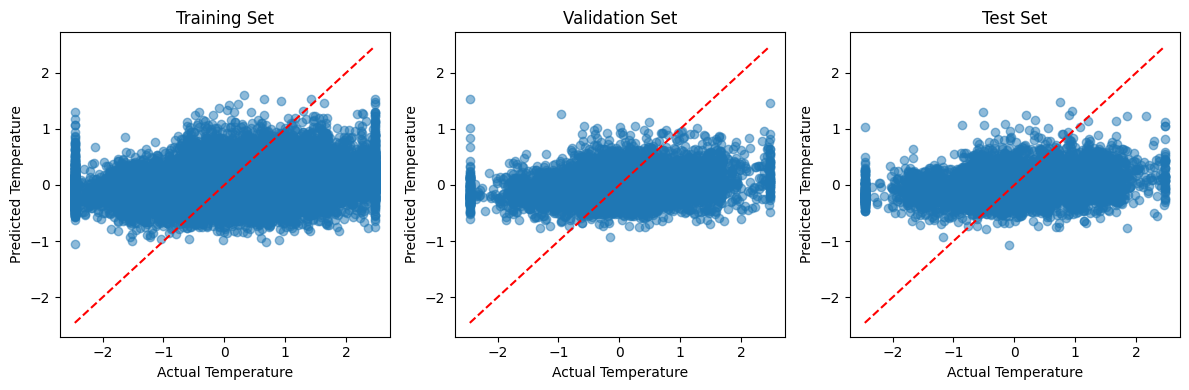


Best Random Forest Model Final Evaluation:

Training Set Metrics:

Training Performance:
MAE: 0.5958
MSE: 0.5926
RMSE: 0.7698
R²: 0.4075

Validation Set Metrics:

Validation Performance:
MAE: 0.6446
MSE: 0.7042
RMSE: 0.8391
R²: 0.2933

Test Set Metrics:

Test Performance:
MAE: 0.6388
MSE: 0.6989
RMSE: 0.8360
R²: 0.3023


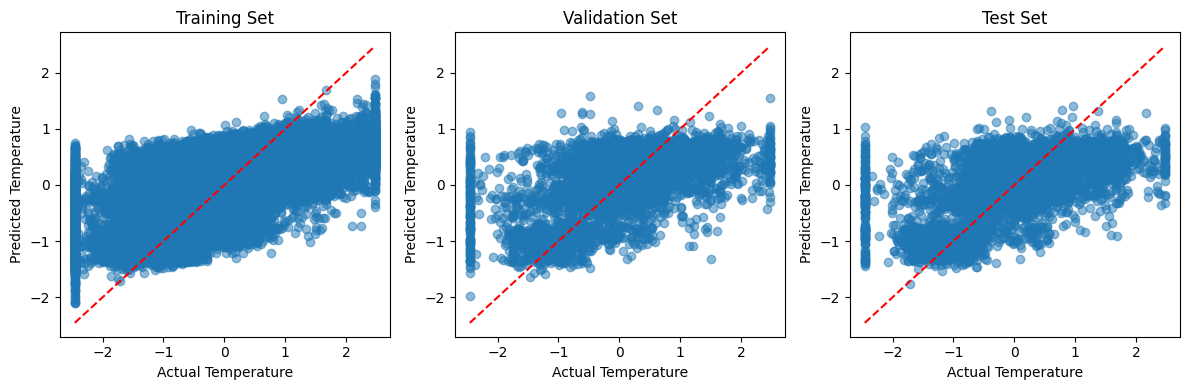

In [67]:
# Get best models
best_ridge = grid_ridge.best_estimator_
best_rf = random_rf.best_estimator_

# Function for final evaluation
def final_model_evaluation(model, model_name):
    # Predictions
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    test_pred = model.predict(X_test)
    
    print(f"\n{model_name} Final Evaluation:")
    print("\nTraining Set Metrics:")
    evaluate_regression_model(y_train, train_pred, "Training")
    
    print("\nValidation Set Metrics:")
    evaluate_regression_model(y_val, val_pred, "Validation")
    
    print("\nTest Set Metrics:")
    evaluate_regression_model(y_test, test_pred, "Test")
    
    # Plot actual vs predicted
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(131)
    plt.scatter(y_train, train_pred, alpha=0.5)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
    plt.xlabel('Actual Temperature')
    plt.ylabel('Predicted Temperature')
    plt.title('Training Set')
    
    plt.subplot(132)
    plt.scatter(y_val, val_pred, alpha=0.5)
    plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
    plt.xlabel('Actual Temperature')
    plt.ylabel('Predicted Temperature')
    plt.title('Validation Set')
    
    plt.subplot(133)
    plt.scatter(y_test, test_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Temperature')
    plt.ylabel('Predicted Temperature')
    plt.title('Test Set')
    
    plt.tight_layout()
    plt.show()

# Evaluate best models
final_model_evaluation(best_ridge, "Best Ridge Model")
final_model_evaluation(best_rf, "Best Random Forest Model")

# DATA SPLITTING - PLANT CLASSIFICATION (CATEGORICAL)
- Use stratified split to maintain class distribution

In [79]:
# Define features (X) and y (target)
X = df_plant_class[[
    'npk_ratio', 
    'growth_environment_score', 
    'water_conditions_score', 
    'crop_rotation',
    'location_Zone_A', 
    'location_Zone_B', 
    'location_Zone_C', 
    'location_Zone_D', 
    'location_Zone_E', 
    'location_Zone_F', 
    'location_Zone_G'
]]
y = df_plant_class['plant_type_stage']  # Using string labels instead of encoded values for better interpretability

# Perform the splits
from sklearn.model_selection import train_test_split

# First split: separate test set
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.15,
    stratify=y,
    random_state=42
)

# Second split: separate train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.176,  # 0.15/0.85 to get 15% of original data
    stratify=y_temp,
    random_state=42
)

# Print the shapes to verify the split
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

# Verify class distribution
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True).round(3))
print("\nClass distribution in validation set:")
print(y_val.value_counts(normalize=True).round(3))
print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True).round(3))

# Optional: Save the initial split sizes for later reference
split_sizes = {
    'train': X_train.shape[0],
    'val': X_val.shape[0],
    'test': X_test.shape[0],
    'total': len(X)
}

print("\nSplit sizes:")
for split, size in split_sizes.items():
    print(f"{split}: {size} ({size/split_sizes['total']*100:.1f}%)")

Training set shape: (35020, 11)
Validation set shape: (7480, 11)
Test set shape: (7500, 11)

Class distribution in training set:
plant_type_stage
Fruiting Vegetables_Seedling      0.086
Leafy Greens_Seedling             0.084
Leafy Greens_Maturity             0.084
Herbs_Vegetative                  0.084
Herbs_Seedling                    0.083
Herbs_Maturity                    0.083
Vine Crops_Vegetative             0.083
Fruiting Vegetables_Vegetative    0.083
Vine Crops_Seedling               0.083
Vine Crops_Maturity               0.082
Leafy Greens_Vegetative           0.082
Fruiting Vegetables_Maturity      0.082
Name: proportion, dtype: float64

Class distribution in validation set:
plant_type_stage
Fruiting Vegetables_Seedling      0.086
Leafy Greens_Seedling             0.084
Leafy Greens_Maturity             0.084
Herbs_Maturity                    0.084
Herbs_Vegetative                  0.084
Herbs_Seedling                    0.083
Vine Crops_Vegetative             0.083
Fruit

## Model Training and Basic Evaluation:
- Accuracy
- Precision, Recall, F1-score (weighted)
- Confusion Matrix
- Classification Report


Random Forest Classification Report:
                                precision    recall  f1-score   support

  Fruiting Vegetables_Maturity       0.44      0.43      0.44       610
  Fruiting Vegetables_Seedling       0.61      0.64      0.62       646
Fruiting Vegetables_Vegetative       0.25      0.25      0.25       623
                Herbs_Maturity       0.32      0.31      0.32       625
                Herbs_Seedling       0.48      0.53      0.50       624
              Herbs_Vegetative       0.29      0.27      0.28       625
         Leafy Greens_Maturity       0.27      0.24      0.26       627
         Leafy Greens_Seedling       0.86      0.83      0.85       631
       Leafy Greens_Vegetative       0.35      0.33      0.34       612
           Vine Crops_Maturity       0.31      0.32      0.31       613
           Vine Crops_Seedling       0.63      0.73      0.67       620
         Vine Crops_Vegetative       0.39      0.39      0.39       624

                      acc

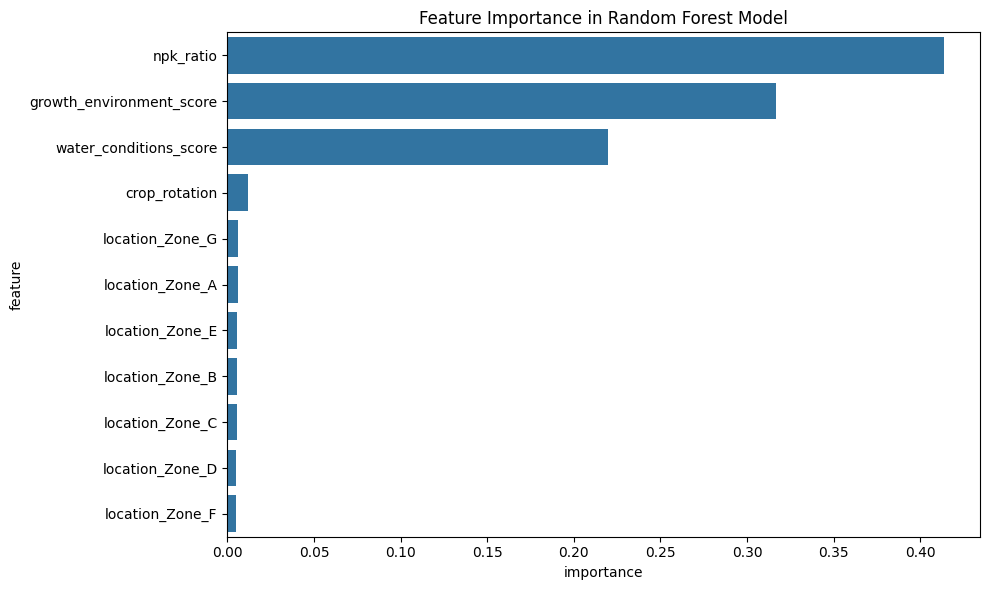

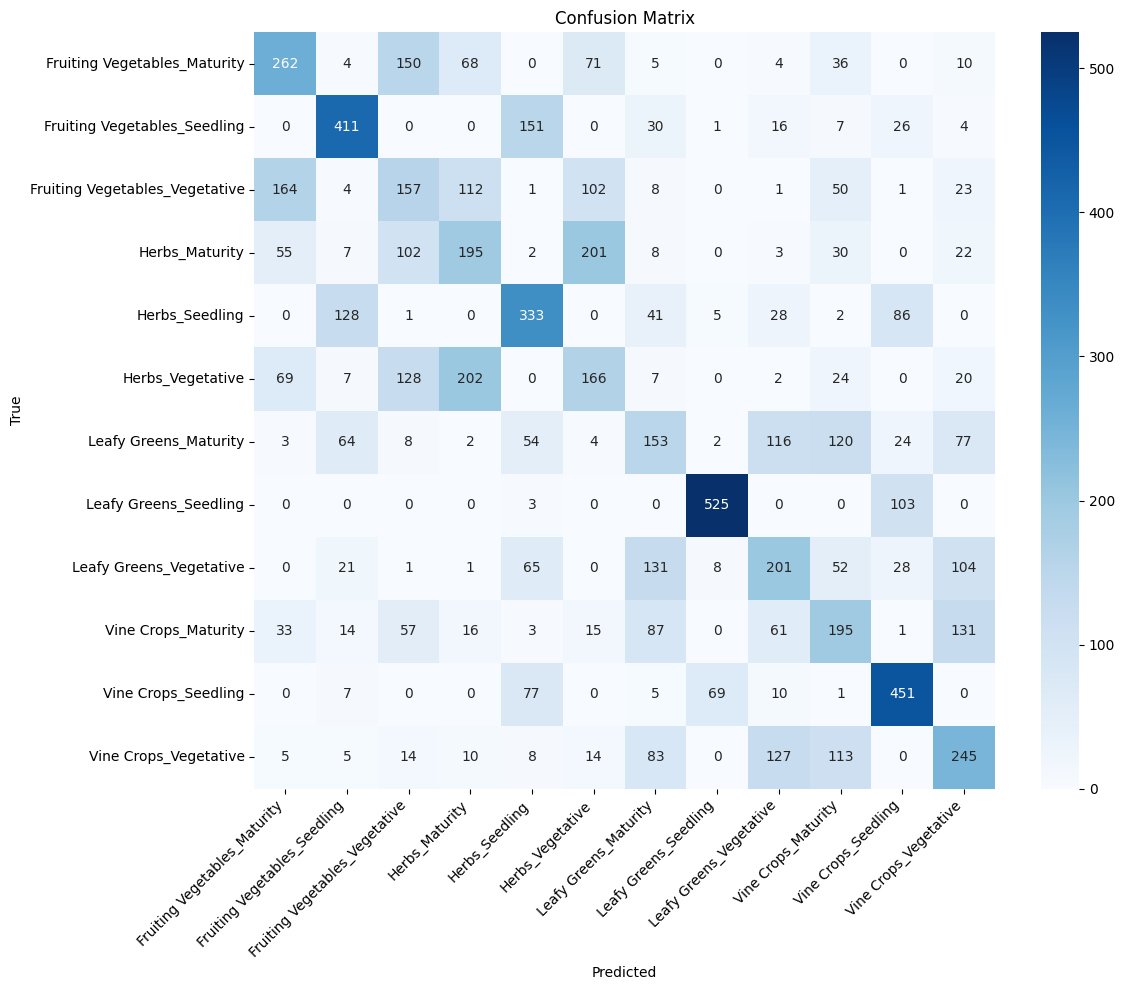


Baseline Model Accuracy: 0.4404


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Train Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Fit the model
rf_model.fit(X_train, y_train)

# 2. Make predictions on validation set
y_val_pred = rf_model.predict(X_val)

# 3. Print classification report
print("Random Forest Classification Report:")
print(classification_report(y_val, y_val_pred))

# 4. Plot feature importance
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Random Forest Model')
plt.tight_layout()
plt.show()

# 5. Plot confusion matrix
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6. Save baseline scores for comparison
baseline_scores = {
    'model': 'Random Forest Baseline',
    'accuracy': rf_model.score(X_val, y_val),
    'feature_importance': feature_importance
}

print(f"\nBaseline Model Accuracy: {baseline_scores['accuracy']:.4f}")

## Feature Importance Analysis
The baseline model's overall accuracy of 44% suggests room for enhancement. Let's analyze the results and plan our next steps:

#### Strong performing classes:
- Leafy Greens_Seedling (85% F1-score)
- Vine Crops_Seedling (67% F1-score)
- Fruiting Vegetables_Seedling (62% F1-score)

#### Weak performing classes:
- Fruiting Vegetables_Vegetative (25% F1-score)
- Leafy Greens_Maturity (26% F1-score)
- Herbs_Vegetative (28% F1-score)

In [82]:
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Create interaction features
def create_interaction_features(X):
    X = X.copy()
    X['npk_growth_interaction'] = X['npk_ratio'] * X['growth_environment_score']
    X['npk_water_interaction'] = X['npk_ratio'] * X['water_conditions_score']
    X['growth_water_interaction'] = X['growth_environment_score'] * X['water_conditions_score']
    return X

# Create pipeline
pipeline = Pipeline([
    ('interaction_features', FunctionTransformer(create_interaction_features)),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        class_weight='balanced'
    ))
])

# Fit pipeline
pipeline.fit(X_train, y_train)

# Evaluate
y_val_pred_improved = pipeline.predict(X_val)
print("Improved Model Classification Report:")
print(classification_report(y_val, y_val_pred_improved))

Improved Model Classification Report:
                                precision    recall  f1-score   support

  Fruiting Vegetables_Maturity       0.52      0.43      0.47       610
  Fruiting Vegetables_Seedling       0.63      0.64      0.64       646
Fruiting Vegetables_Vegetative       0.30      0.33      0.31       623
                Herbs_Maturity       0.35      0.32      0.33       625
                Herbs_Seedling       0.50      0.59      0.54       624
              Herbs_Vegetative       0.36      0.30      0.33       625
         Leafy Greens_Maturity       0.32      0.26      0.29       627
         Leafy Greens_Seedling       0.88      0.83      0.85       631
       Leafy Greens_Vegetative       0.42      0.34      0.38       612
           Vine Crops_Maturity       0.33      0.37      0.35       613
           Vine Crops_Seedling       0.63      0.77      0.69       620
         Vine Crops_Vegetative       0.41      0.48      0.44       624

                      ac

## Hyperparameter Tuning

In [85]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define simplified parameter space
param_dist = {
    'n_estimators': [100, 200],  # Just two options
    'max_depth': [10, None],     # Just two options
    'min_samples_split': [2, 5],  # Just two options
    'min_samples_leaf': [1, 2]    # Just two options
}

# Random Search with minimal settings
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=5,          # Reduced iterations
    cv=3,              # Reduced from 5 to 3
    scoring='accuracy',
    n_jobs=1,          # Single job - no parallel processing
    verbose=0,         # Reduce output
    random_state=42
)

random_search.fit(X_train, y_train)
print("\nBest Parameters:", random_search.best_params_)
print("Best Accuracy Score:", random_search.best_score_)

# Get best model for final evaluation
best_model = random_search.best_estimator_


Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Best Accuracy Score: 0.4790976584467817


## Final Model Evaluation

Final Model Performance Metrics:

Classification Report:
                                precision    recall  f1-score   support

  Fruiting Vegetables_Maturity       0.51      0.44      0.47       612
  Fruiting Vegetables_Seedling       0.64      0.65      0.64       648
Fruiting Vegetables_Vegetative       0.34      0.32      0.33       624
                Herbs_Maturity       0.34      0.35      0.34       626
                Herbs_Seedling       0.49      0.63      0.55       626
              Herbs_Vegetative       0.33      0.25      0.29       627
         Leafy Greens_Maturity       0.33      0.24      0.28       628
         Leafy Greens_Seedling       0.90      0.83      0.86       633
       Leafy Greens_Vegetative       0.41      0.37      0.39       614
           Vine Crops_Maturity       0.33      0.41      0.36       615
           Vine Crops_Seedling       0.62      0.75      0.68       621
         Vine Crops_Vegetative       0.41      0.43      0.42       626

     

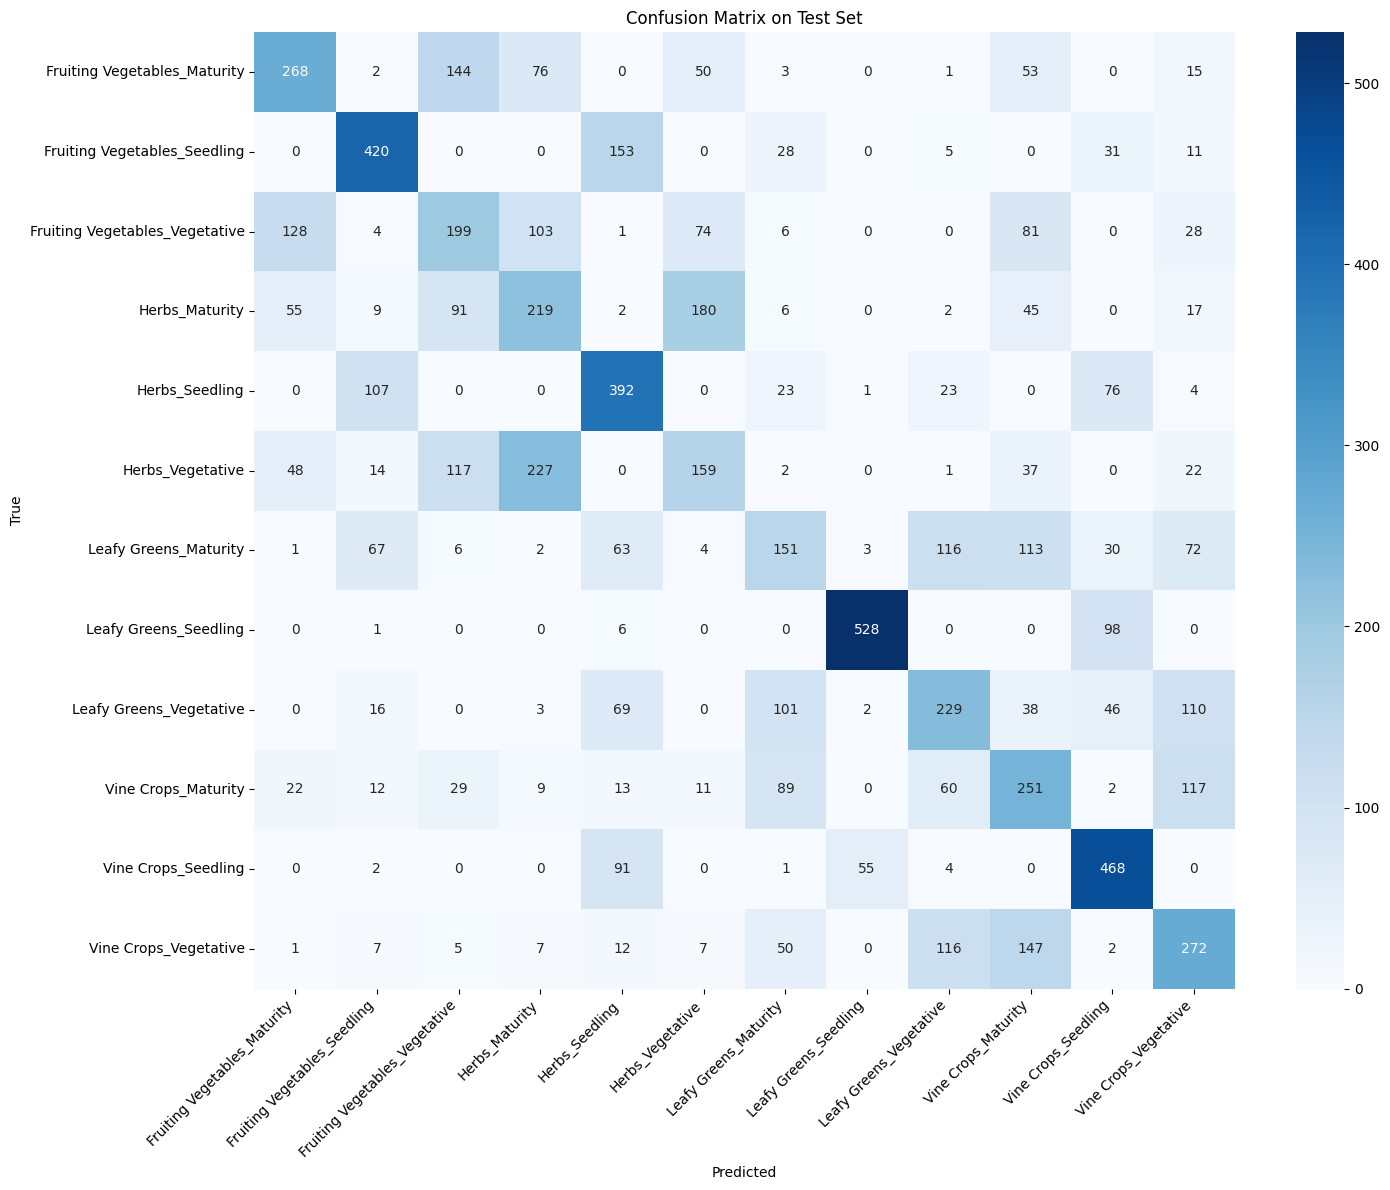

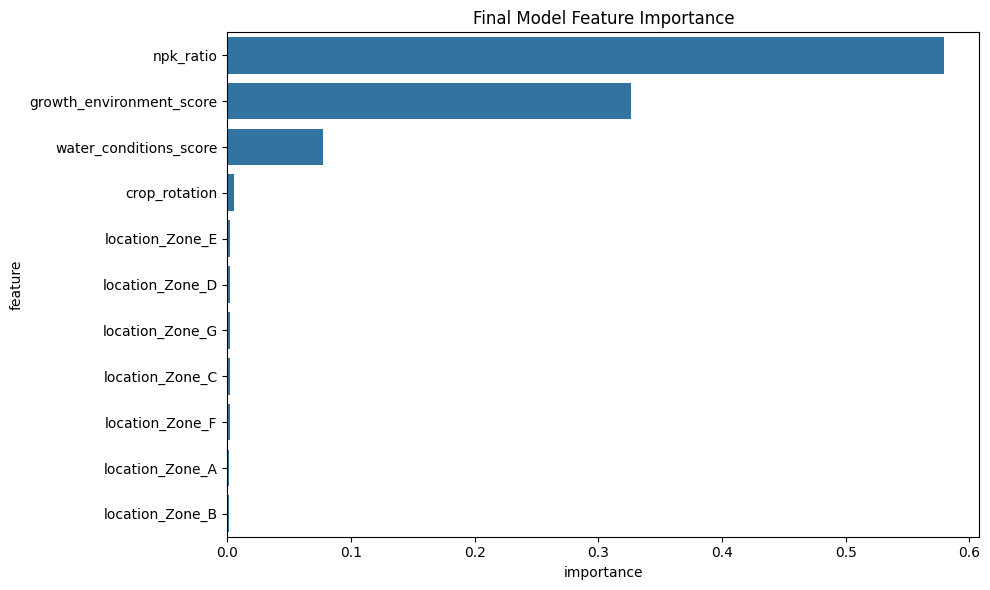


Top 5 Most Important Features:
                    feature  importance
0                 npk_ratio    0.579181
1  growth_environment_score    0.326308
2    water_conditions_score    0.077009
3             crop_rotation    0.005401
8           location_Zone_E    0.001858

Per-class Performance:
                                precision    recall  f1-score      support
Fruiting Vegetables_Maturity     0.512428  0.437908  0.472247   612.000000
Fruiting Vegetables_Seedling     0.635401  0.648148  0.641711   648.000000
Fruiting Vegetables_Vegetative   0.336717  0.318910  0.327572   624.000000
Herbs_Maturity                   0.339009  0.349840  0.344340   626.000000
Herbs_Seedling                   0.488778  0.626198  0.549020   626.000000
Herbs_Vegetative                 0.327835  0.253589  0.285971   627.000000
Leafy Greens_Maturity            0.328261  0.240446  0.277574   628.000000
Leafy Greens_Seedling            0.896435  0.834123  0.864157   633.000000
Leafy Greens_Vegetative      

In [86]:
def final_model_evaluation(model, X_test, y_test, feature_columns):
    # 1. Get predictions on test set
    y_test_pred = model.predict(X_test)
    y_test_pred_proba = model.predict_proba(X_test)

    # 2. Print comprehensive classification report
    print("Final Model Performance Metrics:")
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))
    
    # 3. Overall Accuracy
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"\nOverall Accuracy: {accuracy:.4f}")

    # 4. Confusion Matrix Plot
    plt.figure(figsize=(15, 12))
    cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_,
                yticklabels=model.classes_)
    plt.title('Confusion Matrix on Test Set')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # 5. Feature Importance (if using Random Forest or similar)
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': feature_columns,
            'importance': model.feature_importances_
        })
        feature_importance = feature_importance.sort_values('importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='importance', y='feature', data=feature_importance)
        plt.title('Final Model Feature Importance')
        plt.tight_layout()
        plt.show()
        
        print("\nTop 5 Most Important Features:")
        print(feature_importance.head())

    # 6. Per-class Metrics
    per_class_metrics = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True)).T
    print("\nPer-class Performance:")
    print(per_class_metrics)

    # 7. Save results (optional)
    results = {
        'accuracy': accuracy,
        'classification_report': classification_report(y_test, y_test_pred),
        'confusion_matrix': cm,
        'feature_importance': feature_importance if hasattr(model, 'feature_importances_') else None
    }
    
    return results

# Run the final evaluation
final_results = final_model_evaluation(
    model=best_model,  # Use your best model from hyperparameter tuning
    X_test=X_test,
    y_test=y_test,
    feature_columns=feature_columns
)

# CONCLUSION
1. Top 5 Most Important Features:
- `npk_ratio` is by far the most influential feature (57.9% importance)
- `growth_environment_score` is the second most important (32.6%)
- Together, these two features account for about 90% of the model's decisions
- The location zones and crop rotation have minimal impact on predictions

2. Per-class Performance:
Strong performers:
- `Leafy Greens_Seedling`: Best performing class
  * 89.6% precision (when it predicts this class, it's right 89.6% of the time)
  * 83.4% recall (it correctly identifies 83.4% of actual Leafy Greens seedlings)
  * 86.4% F1-score (harmonic mean of precision and recall)

Moderate performers:
- `Vine Crops_Seedling`: Second best
  * 62.2% precision, 75.4% recall, 68.1% F1-score
- `Fruiting Vegetables_Seedling`: Third best
  * 63.5% precision, 64.8% recall, 64.2% F1-score

Weak performers:
- `Herbs_Vegetative`: 28.6% F1-score
- `Leafy Greens_Maturity`: 27.8% F1-score

Overall Performance:
- Model accuracy: 47.4% across all classes
- Given that we're classifying 12 different classes, this is better than random (8.3%)!